# To make my life a bit easier...

In [1]:
def plot_sed(x, y, yerr):
    plt.clf()
    plt.errorbar(wavelength, flux, yerr=flux_err, c='red', ecolor='gray', capthick=2)
    plt.show()

# Packages

### General packages

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import astropy.io.fits   as pf
import astropy.constants as ct
import os
import time
import scipy.interpolate as sci
import ipywidgets        as widgets

### pPXF imports

In [3]:
import ppxf.miles_util   as lib  # MILES library embedded in ppxf
import ppxf.ppxf_util    as util
import ppxf              as ppxf_module
from ppxf.ppxf           import ppxf
from ppxf.ppxf_util      import log_rebin

# Config. inputs

### Paths and files

In [4]:
seds_path    = '../../../../GAMADR3_SPECTRA/DATABASE/'
results_path = '../../LargeFilesResults/SEDFitting/ResultsRP/'
ppxf_dir     = os.path.dirname(os.path.realpath(ppxf_module.__file__))
miles_lib    = ppxf_dir+'/miles_models/Mun1.30*.fits'

In [5]:
data          = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')
uvup_data     = data.loc[data['UV_CLASS_YI2011']=='UV_UPTURN']
target_sample = uvup_data[uvup_data['WHAN_CLASS']=='Retired/Passive']

In [6]:
seds_list = []
for i in target_sample['SPECID']: seds_list.append(i+'.fit')

### Constants

In [7]:
light_speed = float(str(ct.c.to('km/s')).split(' ')[0])            # selecting the numerical values (must be in km/s)
gama_resol  = 1300.

# Plot parameters (because I'm lazy)

In [8]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.framealpha': 0.6,
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
            }

In [9]:
palette      = ['#ef8a62','#f7f7f7','#67a9cf']
transparency = 0.8
lw           = 2.

# Spectral fitting

## Configuring inputs

### pPXF "fixed" parameters

In [10]:
# Fit (V, sig, h3, h4) moments=4 for the stars; (V, sig) moments=2 for the two gas kinematic components
moments        = [4, 2, 2]
# degree         = -1         # Additive Legendre polynomial degrees
degree         = 80         # Additive Legendre polynomial degrees
mdegree        = 10         # Multiplicative Legendre polynomial degrees
regul_err      = 0.013      # Desired regularization error -- TODO: MUST CHECK WHY 0.013
tied_balmer    = True
limit_doublets = False
stellar_comp_w = [0]        # weight of the stellar component
balmer_comp_w  = [1]        # weight of the balmer emission lines
forbid_comp_w  = [2]        # weight of the forbidden lines
# wl_min         = 3540       # MILES RANGE MIN
# wl_max         = 7409       # MILES RANGE MAX
wl_min = 4350            # removing the bluest part of the spectra in order to mitigate noise effects
wl_max = 7409

### pPXF loop

In [11]:
bar = widgets.IntProgress(value=0, min=0, max=len(seds_list)+1, step=0.5, description='Running pPXF:',
                          orientation='horizontal')
display(bar)

IntProgress(value=0, description='Running pPXF:', max=88)

In [12]:
mean_age   = ['<logAge>']
mean_metal = ['<[M/H]>']
mass2light = ['MASS2LIGHT_R']
ids        = ['CATAID']
redshifts  = ['Z']
vel_disp   = ['VEL_DISP']

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/ppxf/miles_util.py:149: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47504       233     0.001    -0.000
 comp. 1:     47251       714
 comp. 2:     47495       143
chi2/DOF: 0.009588
method = capfit ; Jac calls: 8 ; Func calls: 167 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  78  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      5.035       7.6   47251   714
Comp: 2       Unknown       1.84       6.4   47495   143
Comp: 2       Unknown          0       6.4   47495   143
Comp: 2       Unknown          0       3.8   47495   143
Comp: 2       Unknown          0       2.7   47495   143
---------------------------------------------------------
Weighted <logAge> [yr]: 9.85
Weighted <[M/H]>: -0.194
Weighted <logAge> [yr]: 9.

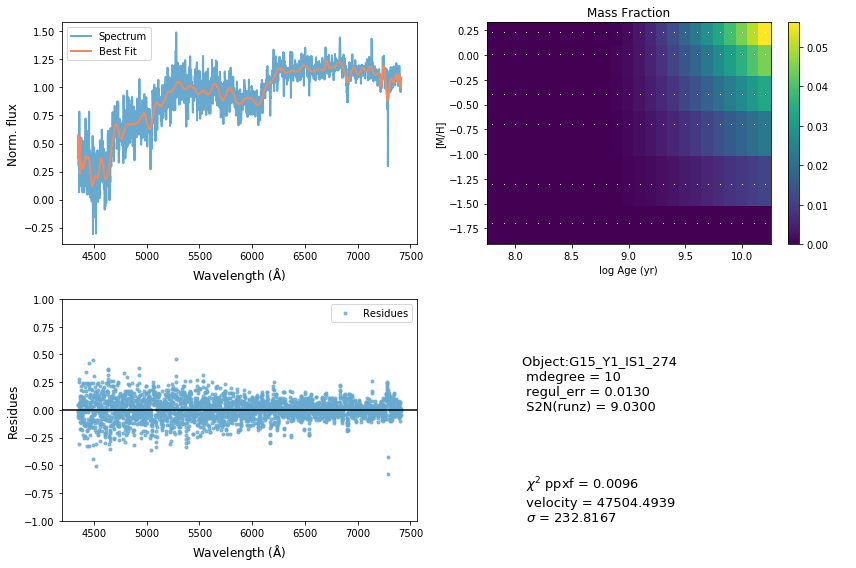

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     41877      1000     0.056    -0.068
 comp. 1:     43877       180
 comp. 2:     44100       191
chi2/DOF: 0.005168
method = capfit ; Jac calls: 7 ; Func calls: 147 ; Status: 3
Gas Reddening E(B-V): 9.715
Nonzero Templates:  136  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       2.2   43877   180
Comp: 2       Unknown          0       3.7   44100   191
Comp: 2       Unknown      1.328       3.4   44100   191
---------------------------------------------------------
Weighted <logAge> [yr]: 9.53
Weighted <[M/H]>: -0.194
Weighted <logAge> [yr]: 9.53
Weighted <[M/H]>: -0.194
M/L_r: 1.035
Current $\chi^2$: 0.0052
Elapsed time in PPXF: 2.69 [min]


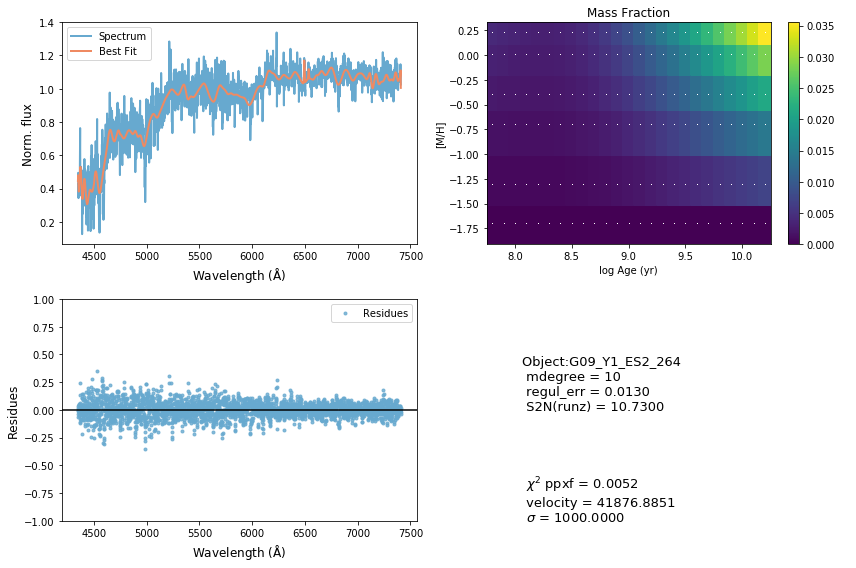

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     38034       660     0.009     0.010
 comp. 1:     38121       582
 comp. 2:     38311        88
chi2/DOF: 0.005157
method = capfit ; Jac calls: 11 ; Func calls: 227 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  107  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.478         7   38121   582
Comp: 2       Unknown          0       3.1   38311    88
Comp: 2       Unknown     0.2847       1.9   38311    88
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.197
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.197
M/L_r: 2.169
Current $\chi^2$: 0.0052
Elapsed time in PPXF: 3.86 [min]


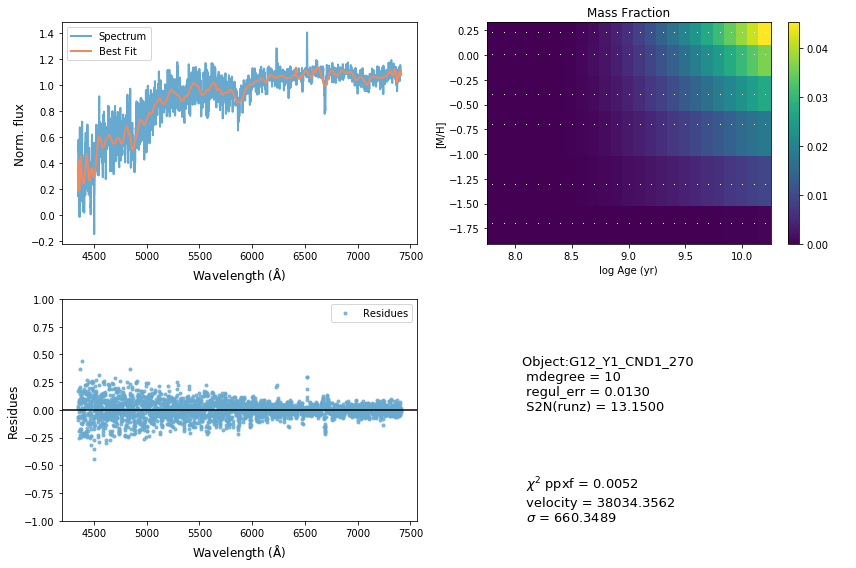

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     37310       219    -0.003     0.008
 comp. 1:     39313       101
 comp. 2:     39147       180
chi2/DOF: 0.01193
method = capfit ; Jac calls: 9 ; Func calls: 187 ; Status: 4
Gas Reddening E(B-V): 4.888
Nonzero Templates:  81  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.3407       1.7   39313   101
Comp: 2       Unknown          0       3.8   39147   180
Comp: 2       Unknown          0       2.8   39147   180
---------------------------------------------------------
Weighted <logAge> [yr]: 8.28
Weighted <[M/H]>: -0.505
Weighted <logAge> [yr]: 8.28
Weighted <[M/H]>: -0.505
M/L_r: 0.2307
Current $\chi^2$: 0.0119
Elapsed time in PPXF: 3.24 [min]


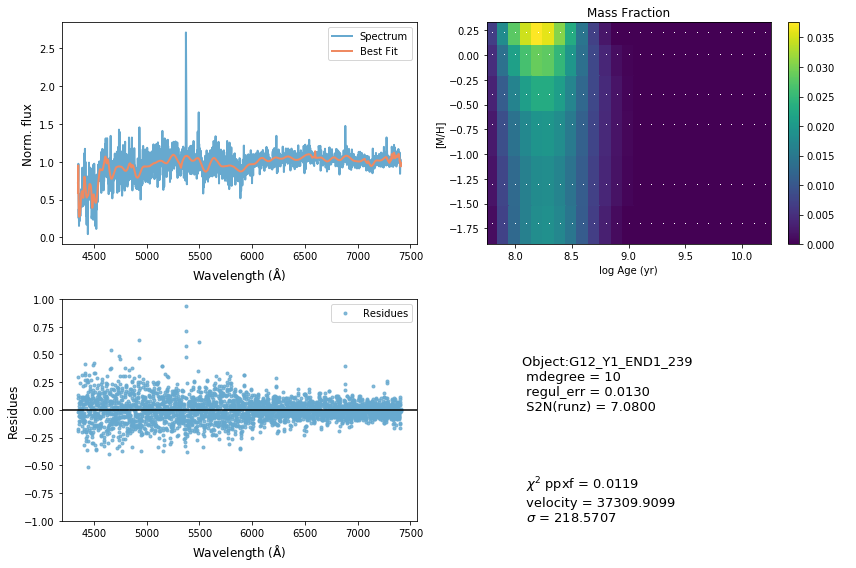

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     68720       441    -0.001     0.001
 comp. 1:     66973       180
 comp. 2:     66987       108
chi2/DOF: 0.006589
method = capfit ; Jac calls: 9 ; Func calls: 188 ; Status: 3
Gas Reddening E(B-V): 9.828
Nonzero Templates:  79  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       2.1   66973   180
Comp: 2       Unknown          0       4.2   66987   108
Comp: 2       Unknown     0.6749       4.3   66987   108
Comp: 2       Unknown          0       2.9   66987   108
---------------------------------------------------------
Weighted <logAge> [yr]: 8.51
Weighted <[M/H]>: -1.17
Weighted <logAge> [yr]: 8.51
Weighted <[M/H]>: -1.17
M/L_r: 0.2348
Current $\chi^2$: 0.0066
Elaps

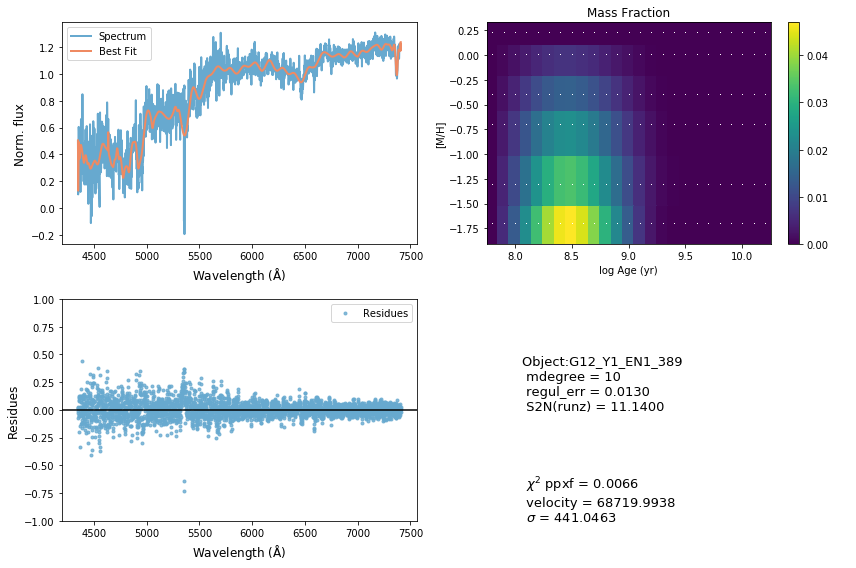

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     35042       144    -0.013     0.000
 comp. 1:     34811       189
 comp. 2:     35617       170
chi2/DOF: 0.01834
method = capfit ; Jac calls: 11 ; Func calls: 225 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  121  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      0.177       4.7   34811   189
Comp: 2       Unknown      1.701       3.9   35617   170
Comp: 2       Unknown     0.6282       2.5   35617   170
Comp: 2       Unknown          0       2.3   35617   170
---------------------------------------------------------
Weighted <logAge> [yr]: 9.64
Weighted <[M/H]>: -1.12
Weighted <logAge> [yr]: 9.64
Weighted <[M/H]>: -1.12
M/L_r: 0.7803
Current $\chi^2$: 0.0183
E

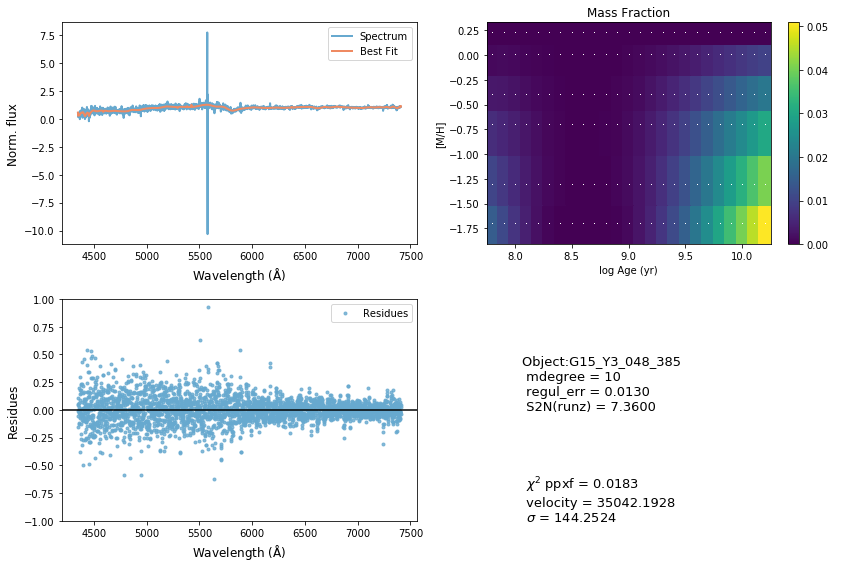

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     58505       490    -0.100    -0.027
 comp. 1:     58701       180
 comp. 2:     58584       352
chi2/DOF: 0.0165
method = capfit ; Jac calls: 8 ; Func calls: 166 ; Status: 4
Gas Reddening E(B-V): 7.533
Nonzero Templates:  134  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown    0.04324       2.9   58701   180
Comp: 2       Unknown      3.556        51   58584   352
Comp: 2       Unknown      1.003        44   58584   352
Comp: 2       Unknown      2.045       5.9   58584   352
---------------------------------------------------------
Weighted <logAge> [yr]: 9.72
Weighted <[M/H]>: -0.216
Weighted <logAge> [yr]: 9.72
Weighted <[M/H]>: -0.216
M/L_r: 1.638
Current $\chi^2$: 0.0165
Elaps

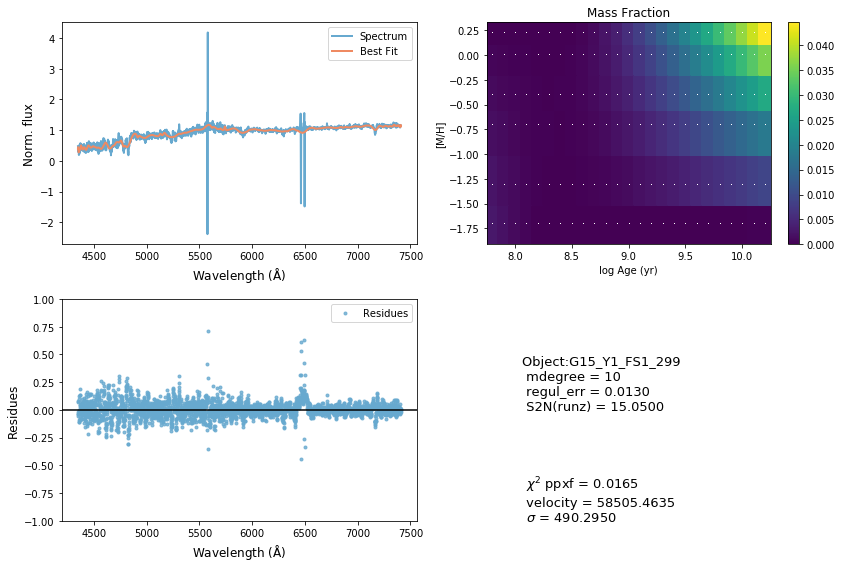

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     49674       300    -0.004    -0.004
 comp. 1:     49584       180
 comp. 2:     50099         1
chi2/DOF: 0.01647
method = capfit ; Jac calls: 15 ; Func calls: 307 ; Status: 2
Gas Reddening E(B-V): 3.741
Nonzero Templates:  31  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       1.9   49584   180
Comp: 2       Unknown     0.3135       2.5   50099     1
Comp: 2       Unknown      0.235         2   50099     1
Comp: 2       Unknown      1.441       2.6   50099     1
---------------------------------------------------------
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.13
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.13
M/L_r: 0.1579
Current $\chi^2$: 0.0165
Elapsed

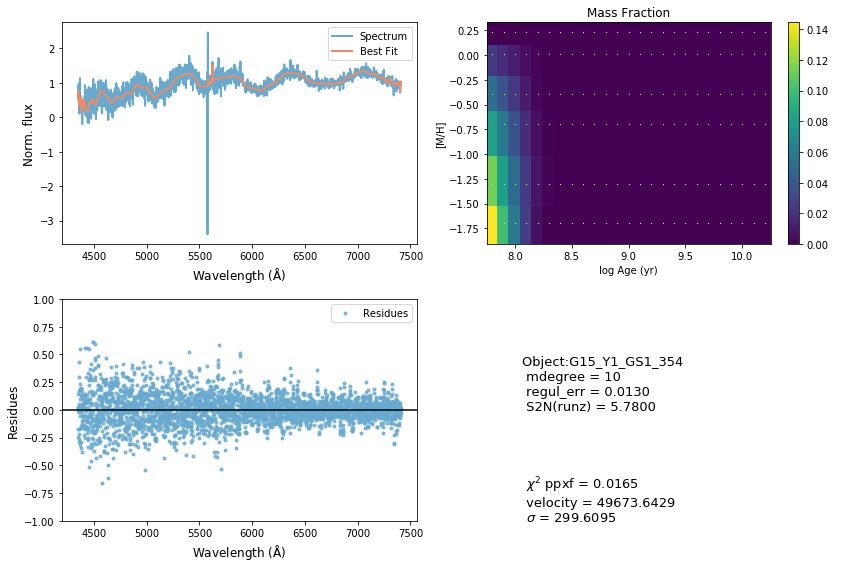

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     53200       542     0.000    -0.001
 comp. 1:     53329       363
 comp. 2:     53244       193
chi2/DOF: 0.02822
method = capfit ; Jac calls: 14 ; Func calls: 289 ; Status: 2
Gas Reddening E(B-V): 5.702
Nonzero Templates:  125  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown       2.79       2.1   53329   363
Comp: 2       Unknown          0        12   53244   193
Comp: 2       Unknown      1.504       5.5   53244   193
Comp: 2       Unknown      1.689       5.7   53244   193
---------------------------------------------------------
Weighted <logAge> [yr]: 9.72
Weighted <[M/H]>: -0.865
Weighted <logAge> [yr]: 9.72
Weighted <[M/H]>: -0.865
M/L_r: 1.487
Current $\chi^2$: 0.0282
Ela

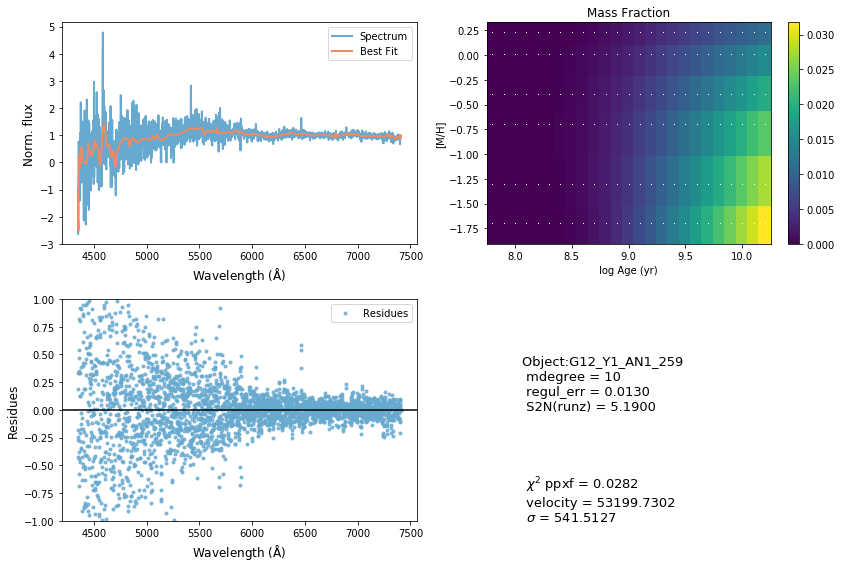

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     43427       854    -0.157    -0.029
 comp. 1:     45427       180
 comp. 2:     45242       143
chi2/DOF: 0.004049
method = capfit ; Jac calls: 10 ; Func calls: 210 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  145  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.3   45427   180
Comp: 2       Unknown     0.4507       3.7   45242   143
Comp: 2       Unknown          0       2.7   45242   143
---------------------------------------------------------
Weighted <logAge> [yr]: 9.7
Weighted <[M/H]>: -0.371
Weighted <logAge> [yr]: 9.7
Weighted <[M/H]>: -0.371
M/L_r: 1.393
Current $\chi^2$: 0.0040
Elapsed time in PPXF: 3.21 [min]


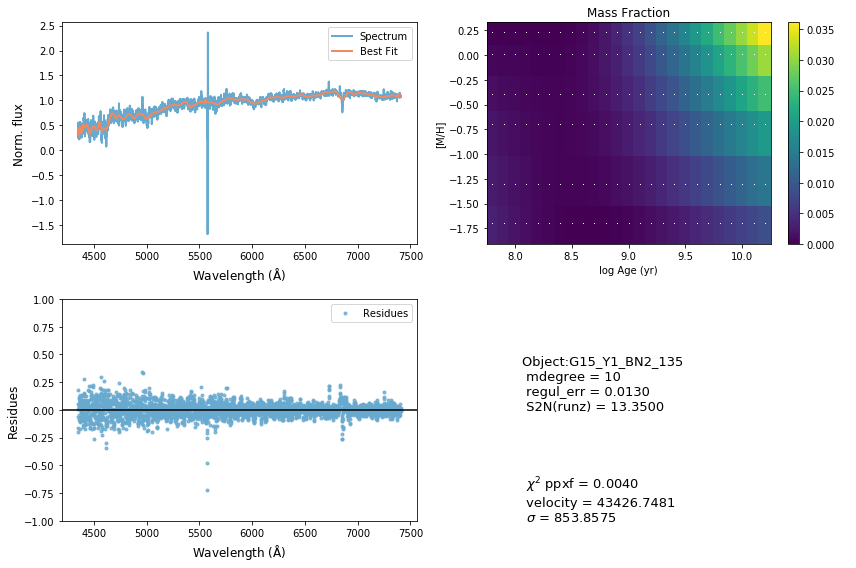

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     43506       314    -0.019    -0.005
 comp. 1:     41427       160
 comp. 2:     41778       160
chi2/DOF: 0.005175
method = capfit ; Jac calls: 14 ; Func calls: 287 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  113  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.7058       3.3   41427   160
Comp: 2       Unknown     0.8169       4.2   41778   160
Comp: 2       Unknown          0       2.4   41778   160
---------------------------------------------------------
Weighted <logAge> [yr]: 9.3
Weighted <[M/H]>: -0.492
Weighted <logAge> [yr]: 9.3
Weighted <[M/H]>: -0.492
M/L_r: 0.4147
Current $\chi^2$: 0.0052
Elapsed time in PPXF: 4.74 [min]


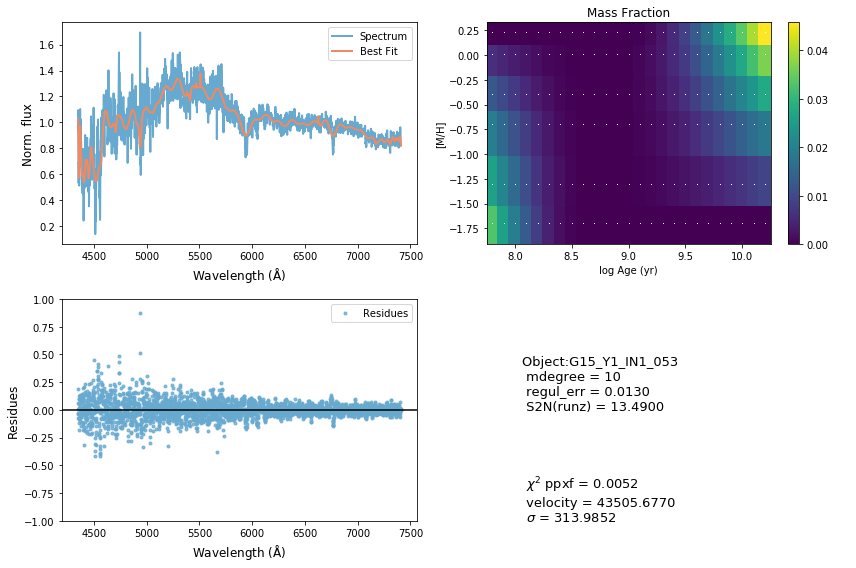

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     50803       907    -0.141     0.005
 comp. 1:     49620        96
 comp. 2:     49593       151
chi2/DOF: 0.01096
method = capfit ; Jac calls: 14 ; Func calls: 288 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  108  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.2699       2.7   49620    96
Comp: 2       Unknown          0       6.3   49593   151
Comp: 2       Unknown      2.189       7.2   49593   151
Comp: 2       Unknown          0       4.2   49593   151
---------------------------------------------------------
Weighted <logAge> [yr]: 9.79
Weighted <[M/H]>: -0.343
Weighted <logAge> [yr]: 9.79
Weighted <[M/H]>: -0.343
M/L_r: 2.232
Current $\chi^2$: 0.0110
Ela

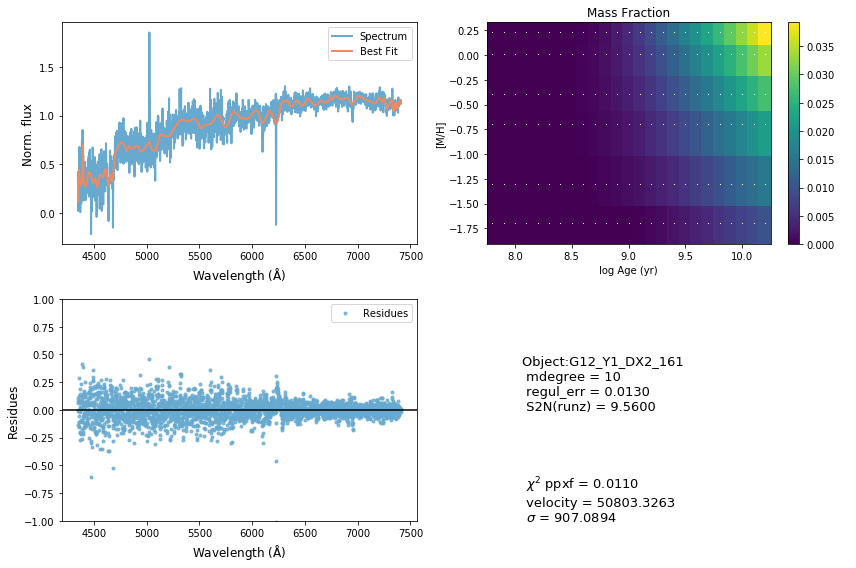

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     31741       519    -0.056    -0.008
 comp. 1:     31709       610
 comp. 2:     31870        54
chi2/DOF: 0.003256
method = capfit ; Jac calls: 9 ; Func calls: 185 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  47  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      2.106       8.9   31709   610
Comp: 2       Unknown     0.5976       2.6   31870    54
Comp: 2       Unknown          0       2.1   31870    54
Comp: 2       Unknown     0.0359         2   31870    54
---------------------------------------------------------
Weighted <logAge> [yr]: 7.94
Weighted <[M/H]>: -1.09
Weighted <logAge> [yr]: 7.94
Weighted <[M/H]>: -1.09
M/L_r: 0.1603
Current $\chi^2$: 0.0033
El

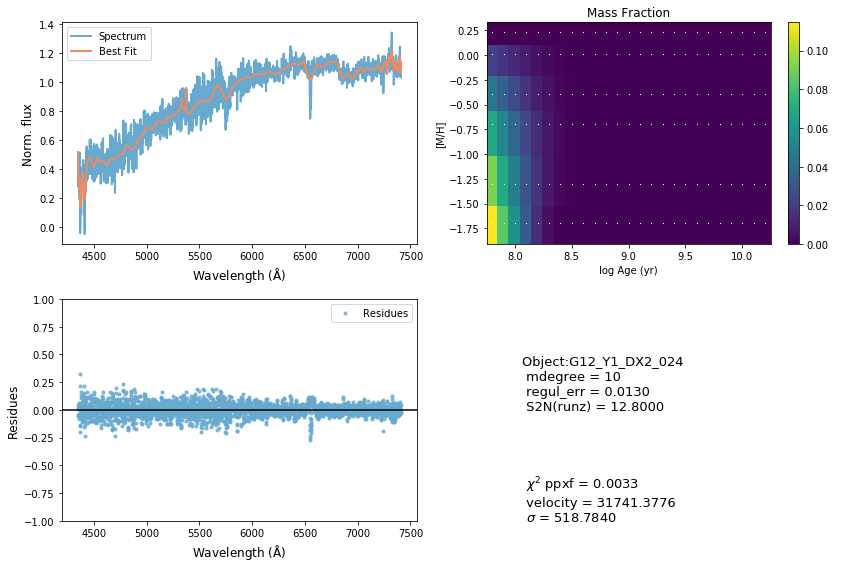

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     46231      1000     0.027    -0.015
 comp. 1:     43631       503
 comp. 2:     44113        94
chi2/DOF: 0.0267
method = capfit ; Jac calls: 9 ; Func calls: 187 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  125  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.792       6.3   43631   503
Comp: 2       Unknown          0       3.1   44113    94
Comp: 2       Unknown     0.3292         2   44113    94
---------------------------------------------------------
Weighted <logAge> [yr]: 8.68
Weighted <[M/H]>: -0.193
Weighted <logAge> [yr]: 8.68
Weighted <[M/H]>: -0.193
M/L_r: 0.2782
Current $\chi^2$: 0.0267
Elapsed time in PPXF: 3.04 [min]


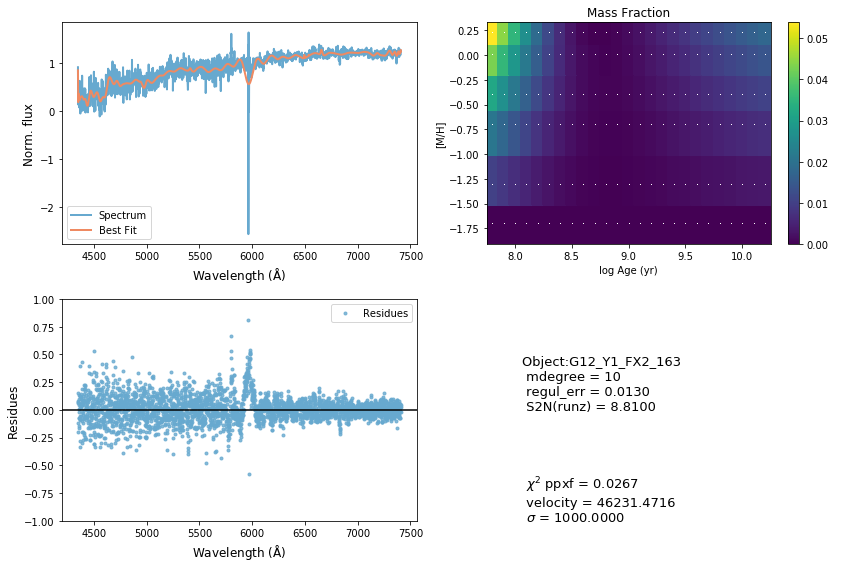

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51024       631     0.049    -0.055
 comp. 1:     50831       189
 comp. 2:     50905       286
chi2/DOF: 0.009436
method = capfit ; Jac calls: 10 ; Func calls: 207 ; Status: 3
Gas Reddening E(B-V): 0.100
Nonzero Templates:  120  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1479       3.7   50831   189
Comp: 2       Unknown          0        11   50905   286
Comp: 2       Unknown      12.87        11   50905   286
Comp: 2       Unknown     0.1848       5.8   50905   286
---------------------------------------------------------
Weighted <logAge> [yr]: 9.67
Weighted <[M/H]>: -0.192
Weighted <logAge> [yr]: 9.67
Weighted <[M/H]>: -0.192
M/L_r: 1.717
Current $\chi^2$: 0.0094
El

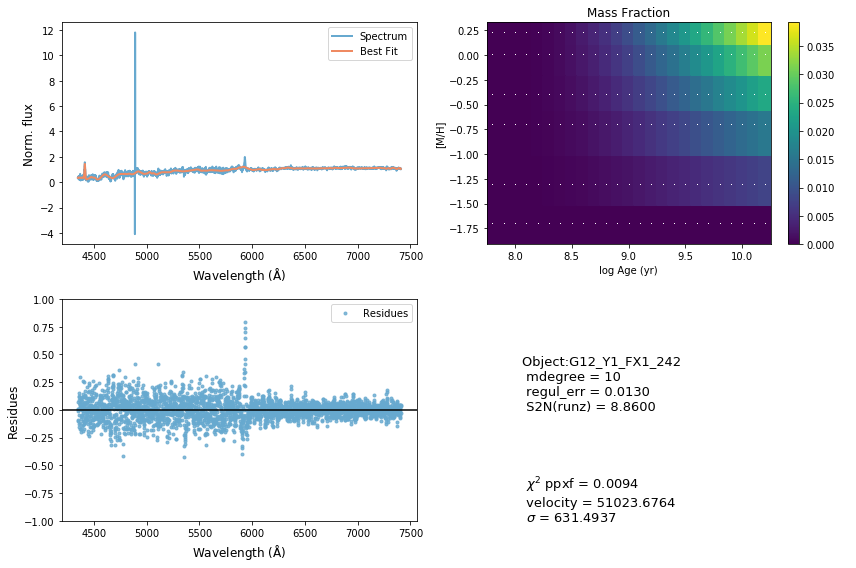

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     56378       328    -0.002    -0.016
 comp. 1:     56279       166
 comp. 2:     56467       180
chi2/DOF: 0.006751
method = capfit ; Jac calls: 10 ; Func calls: 211 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  117  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.122       4.4   56279   166
Comp: 2       Unknown          0       7.2   56467   180
Comp: 2       Unknown          0       7.1   56467   180
Comp: 2       Unknown          0       5.4   56467   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -1.11
M/L_r: 0.9208
Current $\chi^2$: 0.0068
Ela

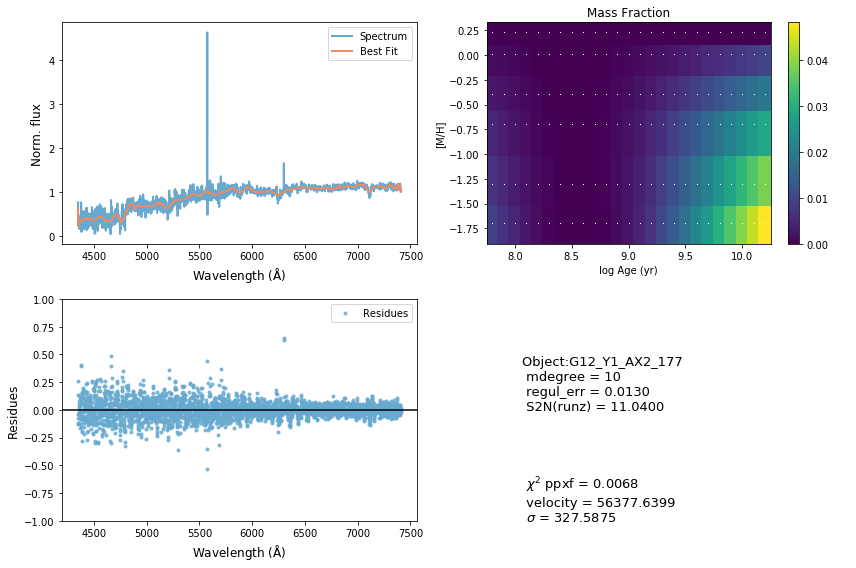

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     41923         1    -0.002    -0.002
 comp. 1:     43924       180
 comp. 2:     43923       179
chi2/DOF: 0.01612
method = capfit ; Jac calls: 1 ; Func calls: 29 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  6  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.7169       4.8   43924   180
Comp: 2       Unknown          0         5   43923   179
Comp: 2       Unknown     0.7662       3.2   43923   179
---------------------------------------------------------
Weighted <logAge> [yr]: 7.83
Weighted <[M/H]>: -1.62
Weighted <logAge> [yr]: 7.83
Weighted <[M/H]>: -1.62
M/L_r: 0.1594
Current $\chi^2$: 0.0161
Elapsed time in PPXF: 0.48 [min]


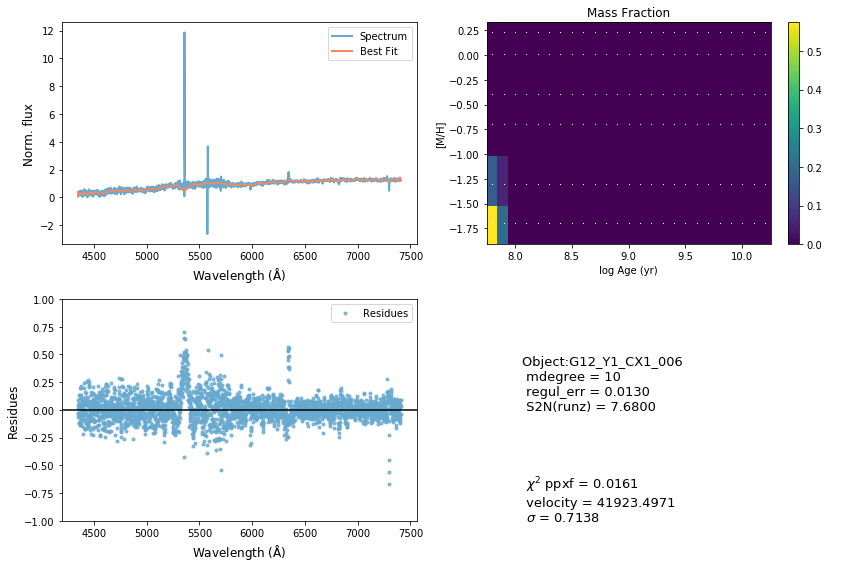

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51007       590     0.146    -0.012
 comp. 1:     50910       180
 comp. 2:     51198       147
chi2/DOF: 0.004224
method = capfit ; Jac calls: 9 ; Func calls: 188 ; Status: 2
Gas Reddening E(B-V): 7.726
Nonzero Templates:  113  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       2.2   50910   180
Comp: 2       Unknown      37.56        70   51198   147
Comp: 2       Unknown      35.12        66   51198   147
Comp: 2       Unknown     0.6147       3.9   51198   147
---------------------------------------------------------
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.234
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.234
M/L_r: 2.193
Current $\chi^2$: 0.0042
Ela

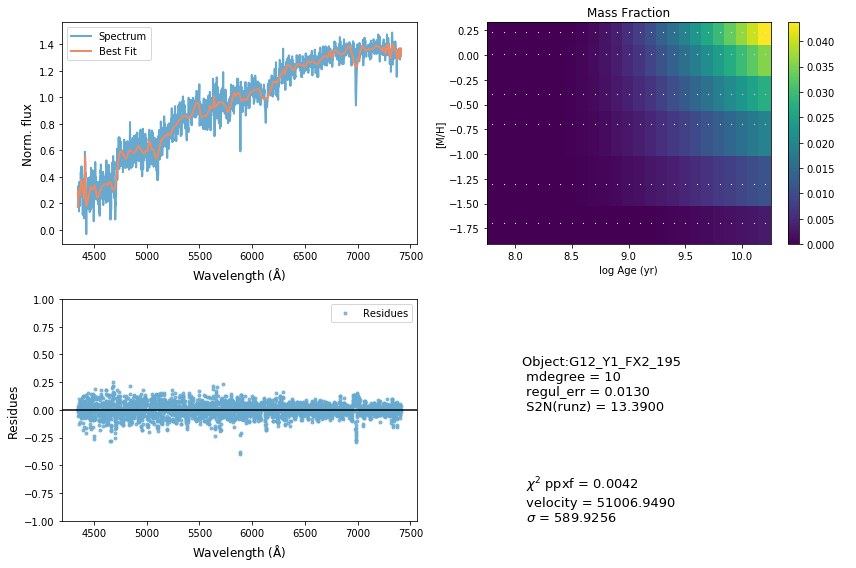

Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     24448       187    -0.008     0.011
 comp. 1:     22586       246
 comp. 2:     22299       540
chi2/DOF: 0.004042
method = capfit ; Jac calls: 20 ; Func calls: 412 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  135  /  156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.633       6.8   22586   246
Comp: 2       Unknown     0.2504         5   22299   540
Comp: 2       Unknown     0.1414       5.1   22299   540
Comp: 2       Unknown          0       6.6   22299   540
Comp: 2       Unknown      2.111         5   22299   540
Comp: 2       Unknown          0       5.1   22299   540
---------------------------------------------------------
Weight

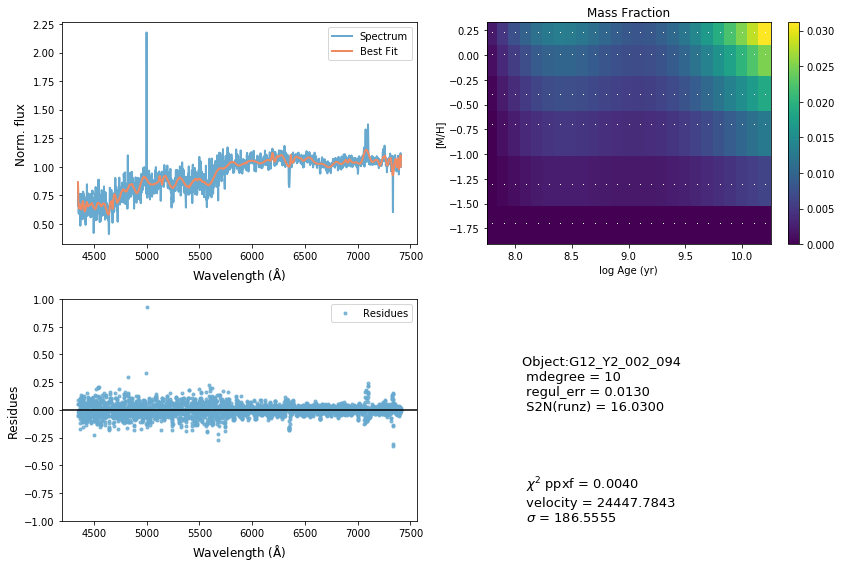

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     48032      1000    -0.005    -0.065
 comp. 1:     48198       308
 comp. 2:     48319       374
chi2/DOF: 0.004219
method = capfit ; Jac calls: 5 ; Func calls: 117 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  103  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.523       5.8   48198   308
Comp: 2       Unknown          0        16   48319   374
Comp: 2       Unknown      14.58        16   48319   374
Comp: 2       Unknown          0       7.3   48319   374
Comp: 2       Unknown     0.6319       4.5   48319   374
---------------------------------------------------------
Weighted <logAge> [yr]: 9.79
Weighted <[M/H]>: -0.205
Weighted <logAge> [yr]: 9

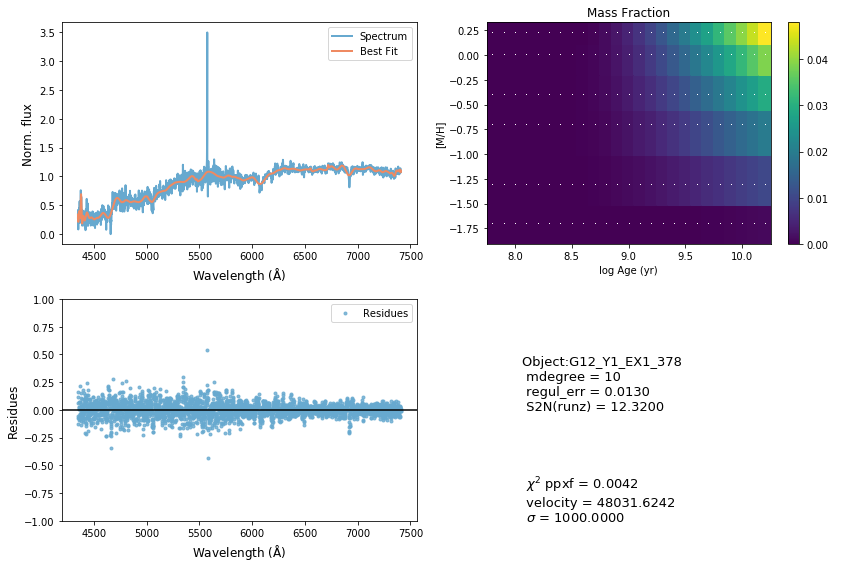

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51347       659    -0.038    -0.020
 comp. 1:     51065       180
 comp. 2:     51238       135
chi2/DOF: 0.004514
method = capfit ; Jac calls: 5 ; Func calls: 109 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  111  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.1   51065   180
Comp: 2       Unknown          0       4.6   51238   135
Comp: 2       Unknown      1.256       4.7   51238   135
Comp: 2       Unknown      1.011       4.2   51238   135
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.195
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.195
M/L_r: 2.133
Current $\chi^2$: 0.0045
Ela

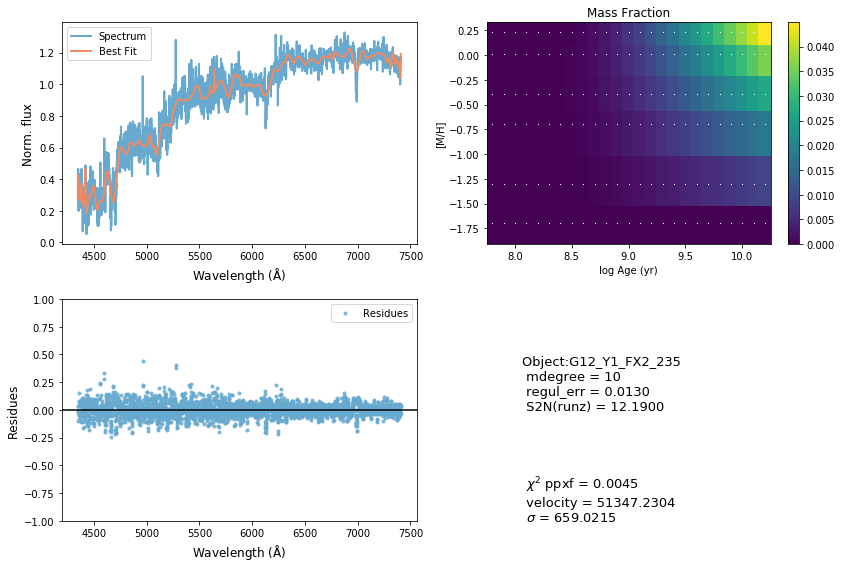

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     72935        90    -0.001    -0.001
 comp. 1:     72838       180
 comp. 2:     72996        88
chi2/DOF: 0.00932
method = capfit ; Jac calls: 7 ; Func calls: 148 ; Status: 2
Gas Reddening E(B-V): 8.013
Nonzero Templates:  75  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       1.7   72838   180
Comp: 2       Unknown          0       3.9   72996    88
Comp: 2       Unknown      1.003       3.9   72996    88
Comp: 2       Unknown     0.2873       2.4   72996    88
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.193
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.193
M/L_r: 2.88
Current $\chi^2$: 0.0093
Elapse

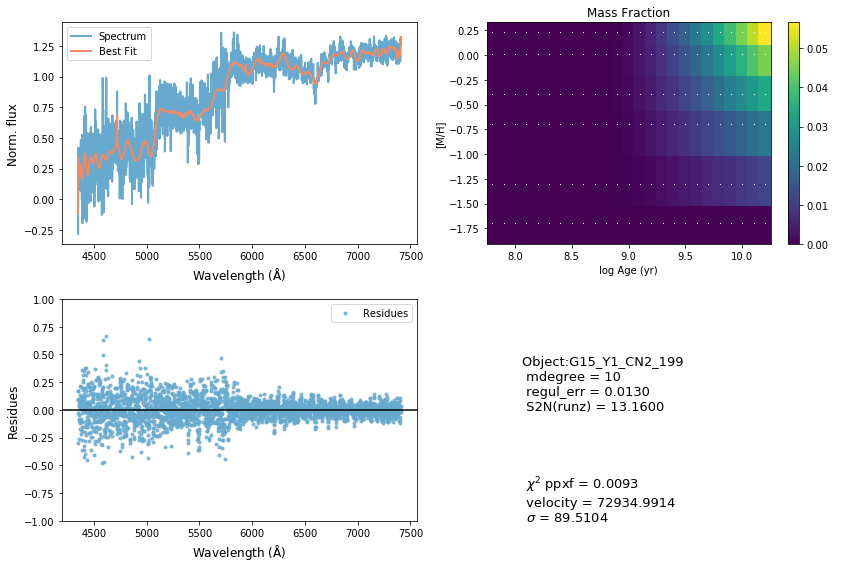

Emission lines included in gas templates:
['Balmer' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     44325       873    -0.139    -0.062
 comp. 1:     46325       180
 comp. 2:     46194       301
chi2/DOF: 0.003325
method = capfit ; Jac calls: 10 ; Func calls: 209 ; Status: 2
Gas Reddening E(B-V): 3.529
Nonzero Templates:  126  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       1.9   46325   180
Comp: 2       Unknown         54       5.1   46194   301
Comp: 2       Unknown          0       5.5   46194   301
Comp: 2       Unknown          0       3.2   46194   301
---------------------------------------------------------
Weighted <logAge> [yr]: 9.37
Weighted <[M/H]>: -0.454
Weighted <logAge> [yr]: 9.37
Weighted <[M/H]>: -0.454
M/L_r: 0.4851
Current $\chi^2$: 0.0033


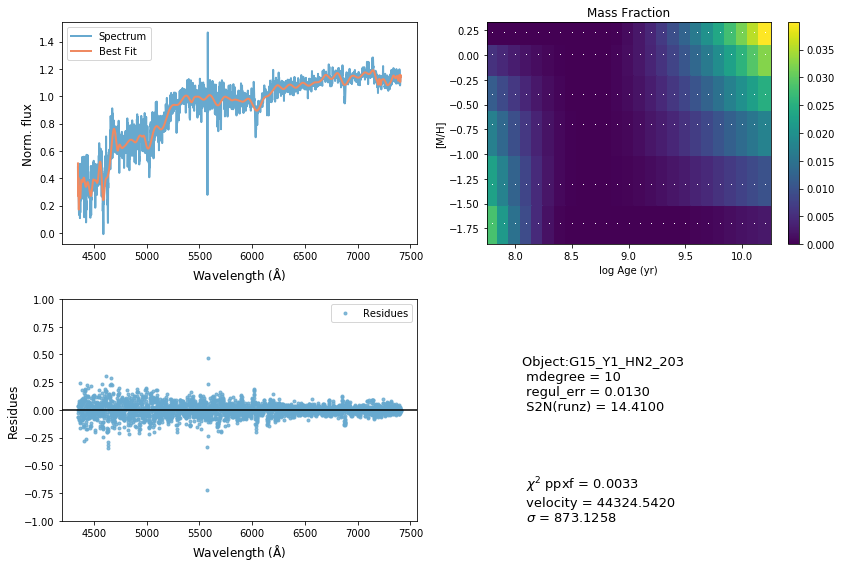

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     59729       520    -0.083    -0.115
 comp. 1:     59449       384
 comp. 2:     59972        25
chi2/DOF: 0.01084
method = capfit ; Jac calls: 8 ; Func calls: 169 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  136  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      5.241       7.3   59449   384
Comp: 2       Unknown          0       2.6   59972    25
Comp: 2       Unknown          0       2.6   59972    25
Comp: 2       Unknown     0.3991       2.5   59972    25
---------------------------------------------------------
Weighted <logAge> [yr]: 9.67
Weighted <[M/H]>: -0.289
Weighted <logAge> [yr]: 9.67
Weighted <[M/H]>: -0.289
M/L_r: 1.646
Current $\chi^2$: 0.0108
Elap

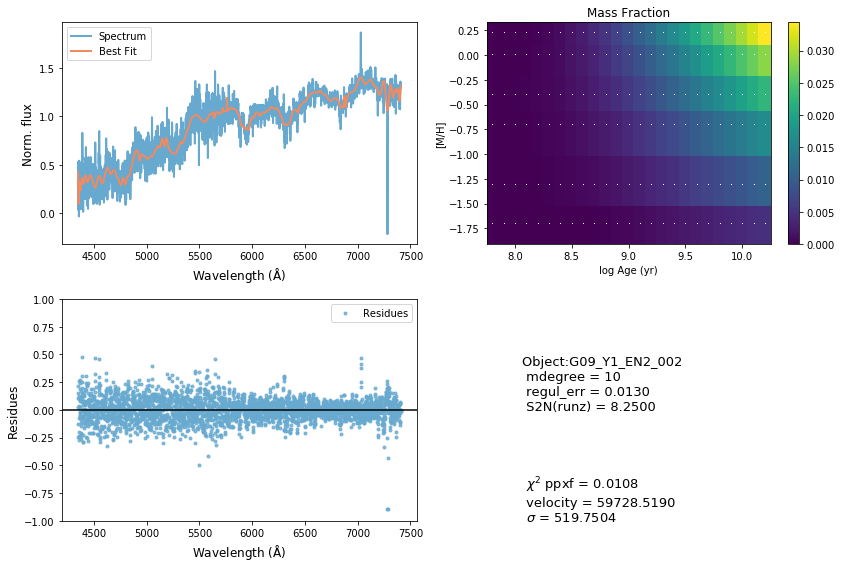

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     33200       303    -0.007    -0.010
 comp. 1:     35201        70
 comp. 2:     34934       172
chi2/DOF: 0.002828
method = capfit ; Jac calls: 13 ; Func calls: 272 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  118  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.3998       2.8   35201    70
Comp: 2       Unknown     0.1607       3.9   34934   172
Comp: 2       Unknown          0       3.1   34934   172
Comp: 2       Unknown     0.3272       2.7   34934   172
---------------------------------------------------------
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.721
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.721
M/L_r: 1.834
Current $\chi^2$: 0.0028

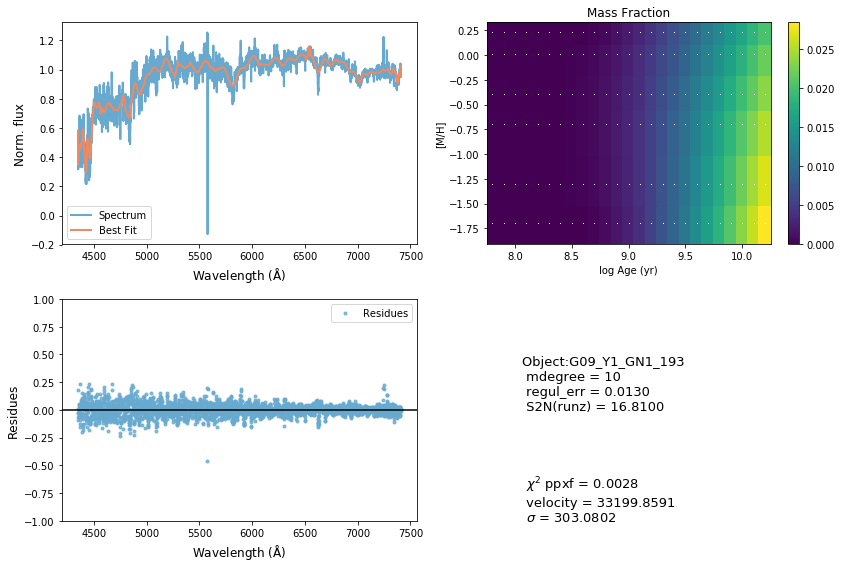

Emission lines included in gas templates:
['Balmer' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     48088       973     0.165     0.018
 comp. 1:     46383        62
 comp. 2:     46376       380
chi2/DOF: 0.006869
method = capfit ; Jac calls: 13 ; Func calls: 267 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  112  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.2652       1.3   46383    62
Comp: 2       Unknown     0.5494       1.5   46376   380
Comp: 2       Unknown          0       6.6   46376   380
Comp: 2       Unknown          0         4   46376   380
---------------------------------------------------------
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.11
M/L_r: 1.244
Current $\chi^2$: 0.0069
El

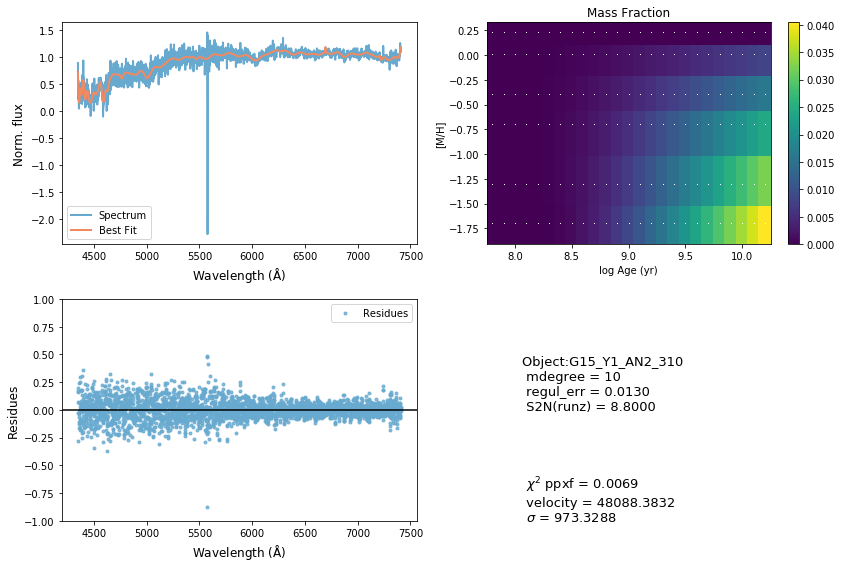

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     36434       664     0.002     0.001
 comp. 1:     36399       680
 comp. 2:     36588        66
chi2/DOF: 0.04923
method = capfit ; Jac calls: 10 ; Func calls: 205 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  36  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      13.05       9.2   36399   680
Comp: 2       Unknown      2.159       2.7   36588    66
Comp: 2       Unknown          0         2   36588    66
---------------------------------------------------------
Weighted <logAge> [yr]: 10
Weighted <[M/H]>: -0.0811
Weighted <logAge> [yr]: 10
Weighted <[M/H]>: -0.0811
M/L_r: 4.643
Current $\chi^2$: 0.0492
Elapsed time in PPXF: 3.22 [min]


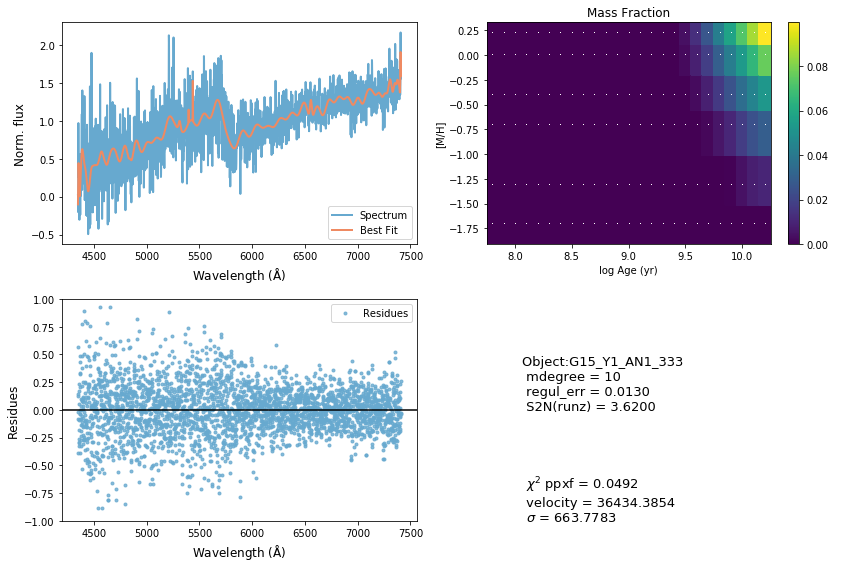

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     44101       942    -0.082    -0.098
 comp. 1:     45308       857
 comp. 2:     46019       180
chi2/DOF: 0.003099
method = capfit ; Jac calls: 13 ; Func calls: 269 ; Status: 2
Gas Reddening E(B-V): 4.591
Nonzero Templates:  133  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      2.026         5   45308   857
Comp: 2       Unknown          0       4.2   46019   180
Comp: 2       Unknown          0       3.1   46019   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -0.238
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -0.238
M/L_r: 1.723
Current $\chi^2$: 0.0031
Elapsed time in PPXF: 4.37 [min]


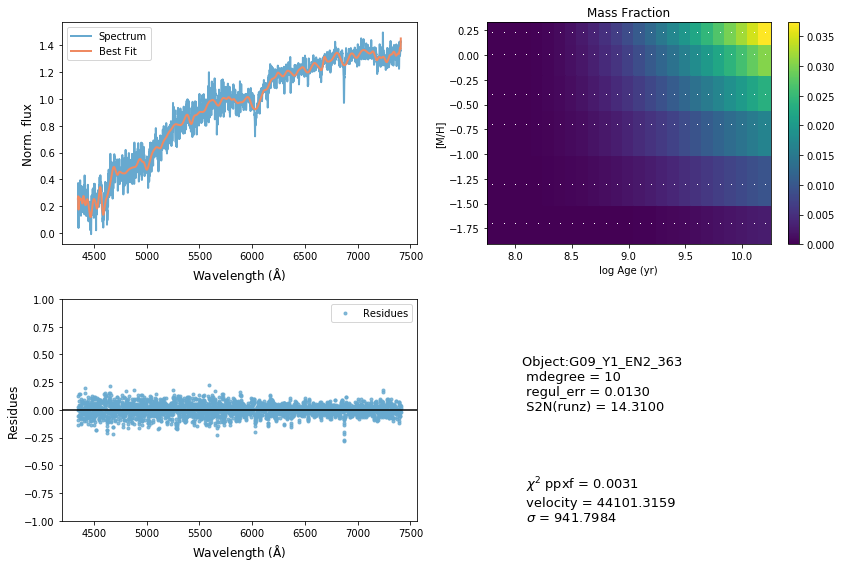

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     41373        42    -0.000    -0.001
 comp. 1:     41346        90
 comp. 2:     41258       180
chi2/DOF: 0.01009
method = capfit ; Jac calls: 8 ; Func calls: 166 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  126  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.6524       2.9   41346    90
Comp: 2       Unknown          0         4   41258   180
Comp: 2       Unknown          0       2.8   41258   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.46
Weighted <[M/H]>: -0.828
Weighted <logAge> [yr]: 9.46
Weighted <[M/H]>: -0.828
M/L_r: 0.9527
Current $\chi^2$: 0.0101
Elapsed time in PPXF: 2.87 [min]


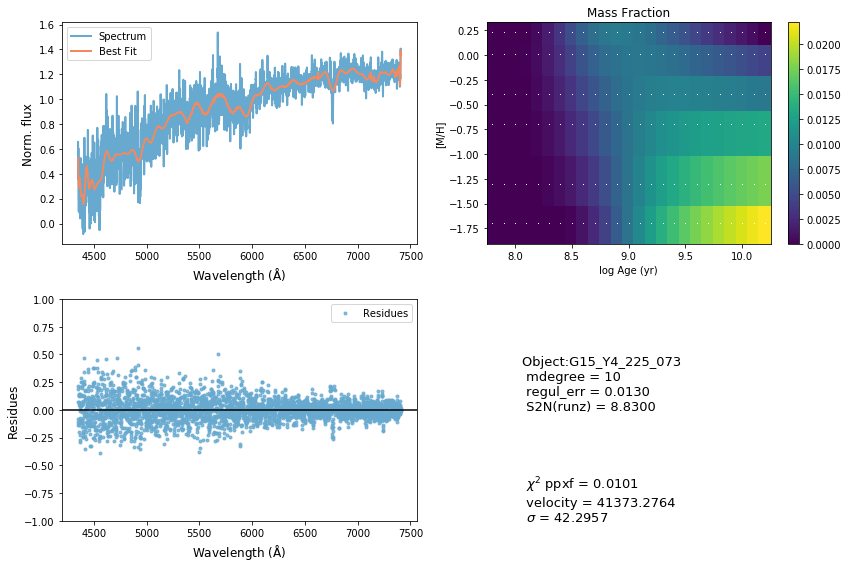

Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     26985         1    -0.002    -0.003
 comp. 1:     27070       332
 comp. 2:     26860        65
chi2/DOF: 0.008899
method = capfit ; Jac calls: 14 ; Func calls: 292 ; Status: 2
Gas Reddening E(B-V): 7.534
Nonzero Templates:  140  /  156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      8.786       6.9   27070   332
Comp: 2       Unknown          0       1.3   26860    65
Comp: 2       Unknown     0.1687       1.4   26860    65
Comp: 2       Unknown     0.1048       2.6   26860    65
Comp: 2       Unknown     0.7331       2.3   26860    65
Comp: 2       Unknown          0       1.7   26860    65
---------------------------------------------------------
Weight

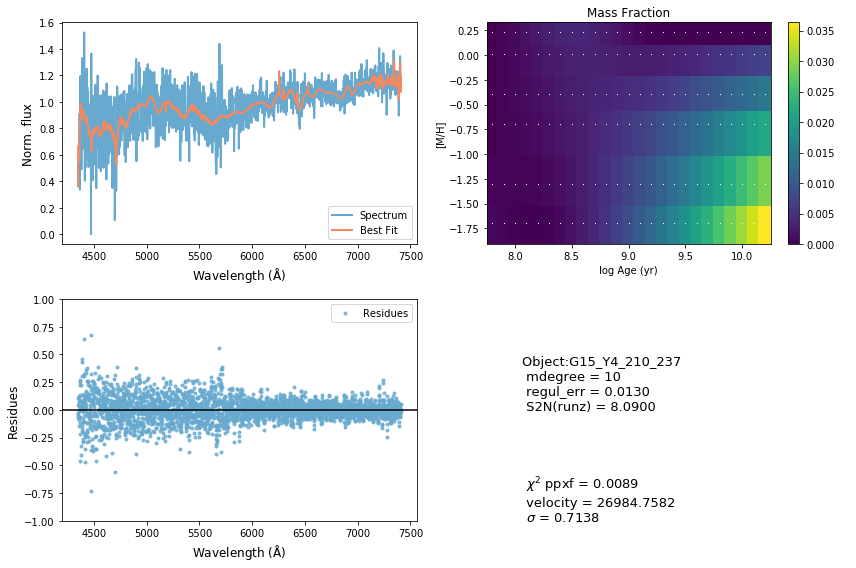

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     33170      1000    -0.002    -0.002
 comp. 1:     34555       180
 comp. 2:     34522       111
chi2/DOF: 0.0059
method = capfit ; Jac calls: 7 ; Func calls: 145 ; Status: 2
Gas Reddening E(B-V): 9.529
Nonzero Templates:  109  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.2   34555   180
Comp: 2       Unknown     0.8389       2.9   34522   111
Comp: 2       Unknown          0       3.3   34522   111
Comp: 2       Unknown          0       2.2   34522   111
---------------------------------------------------------
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.213
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.213
M/L_r: 2.189
Current $\chi^2$: 0.0059
El

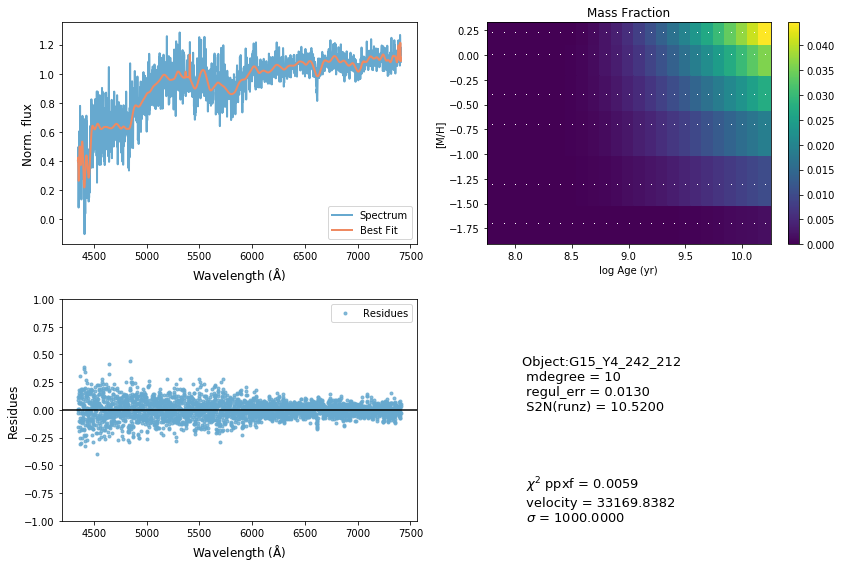

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     79486      1000    -0.002    -0.002
 comp. 1:     77486       183
 comp. 2:     77484       178
chi2/DOF: 0.05061
method = capfit ; Jac calls: 1 ; Func calls: 28 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  8  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown    0.09594         4   77486   183
Comp: 2       Unknown          0       5.1   77484   178
Comp: 2       Unknown     0.1222       5.1   77484   178
Comp: 2       Unknown          0       3.3   77484   178
---------------------------------------------------------
Weighted <logAge> [yr]: 10.2
Weighted <[M/H]>: 0.165
Weighted <logAge> [yr]: 10.2
Weighted <[M/H]>: 0.165
M/L_r: 7.205
Current $\chi^2$: 0.0506
Elapsed t

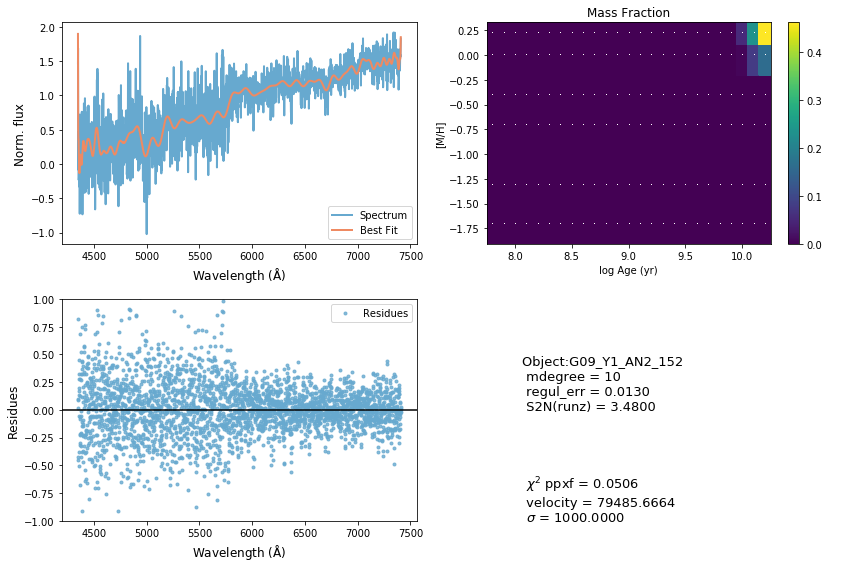

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51588       209     0.034    -0.042
 comp. 1:     51618        88
 comp. 2:     51760        98
chi2/DOF: 0.009503
method = capfit ; Jac calls: 10 ; Func calls: 209 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  115  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.663       2.9   51618    88
Comp: 2       Unknown          0       4.9   51760    98
Comp: 2       Unknown      2.741       5.1   51760    98
Comp: 2       Unknown     0.1829       3.5   51760    98
---------------------------------------------------------
Weighted <logAge> [yr]: 9.04
Weighted <[M/H]>: -0.186
Weighted <logAge> [yr]: 9.04
Weighted <[M/H]>: -0.186
M/L_r: 0.3619
Current $\chi^2$: 0.0095
E

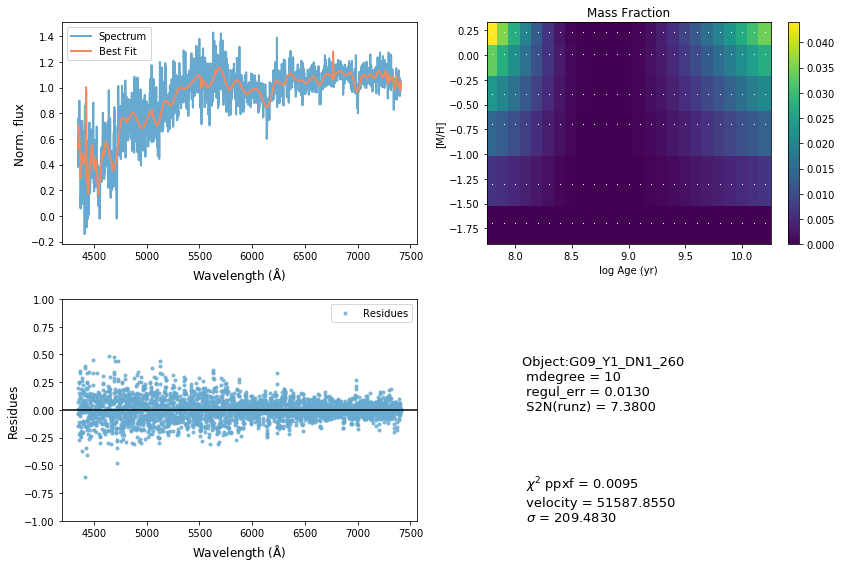

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     54314       347     0.016    -0.006
 comp. 1:     54864        50
 comp. 2:     55510       211
chi2/DOF: 0.008859
method = capfit ; Jac calls: 22 ; Func calls: 454 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  144  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.7693       2.5   54864    50
Comp: 2       Unknown          0       7.6   55510   211
Comp: 2       Unknown      4.126       7.7   55510   211
Comp: 2       Unknown     0.9292       6.8   55510   211
---------------------------------------------------------
Weighted <logAge> [yr]: 9.24
Weighted <[M/H]>: -0.849
Weighted <logAge> [yr]: 9.24
Weighted <[M/H]>: -0.849
M/L_r: 0.4586
Current $\chi^2$: 0.0089
E

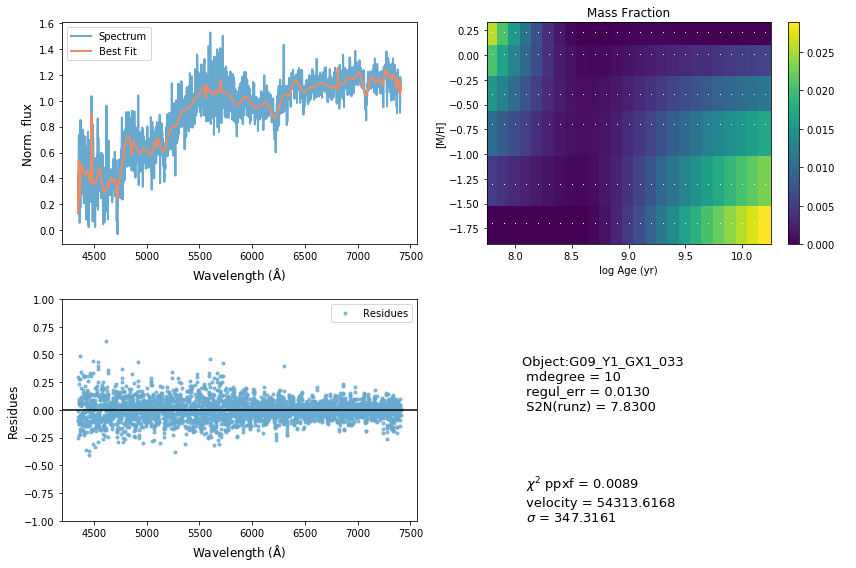

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     55628       518    -0.006    -0.053
 comp. 1:     53628       180
 comp. 2:     53209      1000
chi2/DOF: 0.002686
method = capfit ; Jac calls: 23 ; Func calls: 470 ; Status: 2
Gas Reddening E(B-V): 9.521
Nonzero Templates:  93  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       2.3   53628   180
Comp: 2       Unknown       7835   3.5e+03   53209  1000
Comp: 2       Unknown       7892   3.5e+03   53209  1000
Comp: 2       Unknown      4.387        12   53209  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.207
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.207
M/L_r: 2.598
Current $\chi^2$: 0.0027
Ela

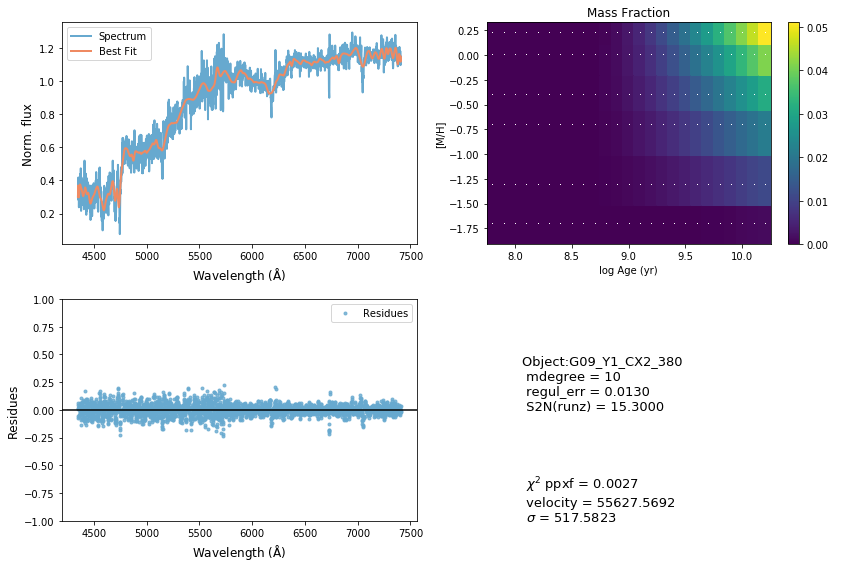

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     56769       283     0.019    -0.006
 comp. 1:     56839       249
 comp. 2:     56812       180
chi2/DOF: 0.004638
method = capfit ; Jac calls: 6 ; Func calls: 127 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  28  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.0903       5.4   56839   249
Comp: 2       Unknown          0       5.6   56812   180
Comp: 2       Unknown          0       5.6   56812   180
Comp: 2       Unknown          0       5.6   56812   180
---------------------------------------------------------
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.16
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.16
M/L_r: 0.1581
Current $\chi^2$: 0.0046
Elapsed

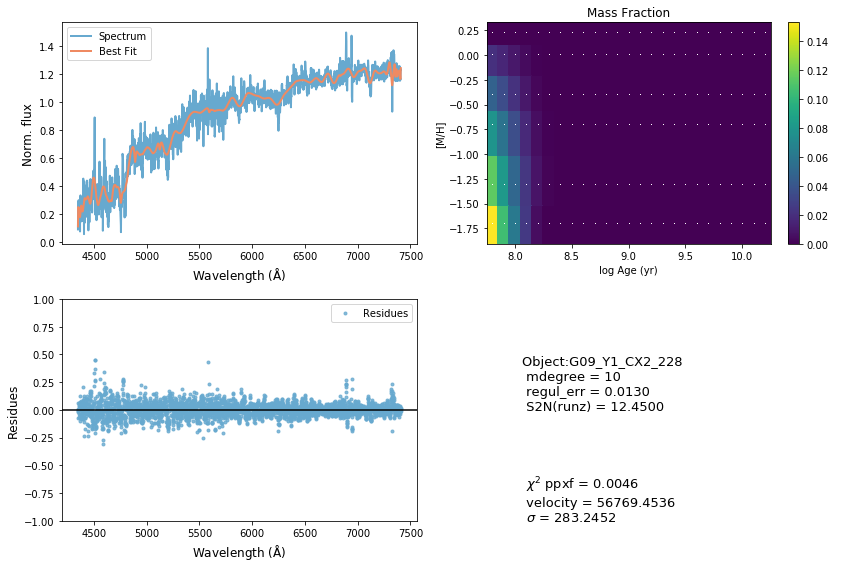

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     74732       101     0.002    -0.020
 comp. 1:     74601       349
 comp. 2:     74708       134
chi2/DOF: 0.0253
method = capfit ; Jac calls: 6 ; Func calls: 129 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  134  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.237         5   74601   349
Comp: 2       Unknown          0       5.2   74708   134
Comp: 2       Unknown     0.2959       4.9   74708   134
Comp: 2       Unknown          0       2.7   74708   134
---------------------------------------------------------
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.902
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -0.902
M/L_r: 1.321
Current $\chi^2$: 0.0253
Elaps

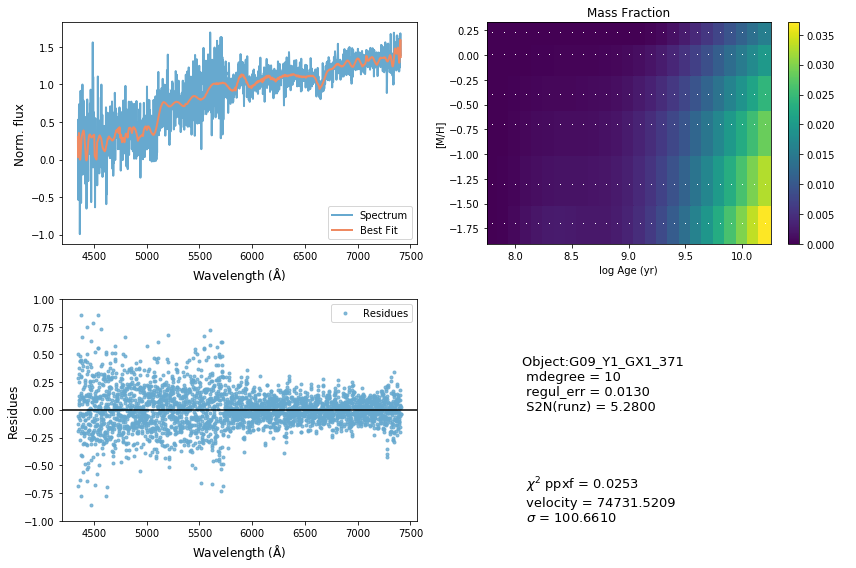

Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     19346      1000     0.031    -0.019
 comp. 1:     19528       490
 comp. 2:     19745       377
chi2/DOF: 0.002581
method = capfit ; Jac calls: 15 ; Func calls: 312 ; Status: 2
Gas Reddening E(B-V): 3.422
Nonzero Templates:  120  /  156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown        6.1       9.2   19528   490
Comp: 2       Unknown          0       4.3   19745   377
Comp: 2       Unknown          0       4.2   19745   377
Comp: 2       Unknown          0       5.3   19745   377
Comp: 2       Unknown     0.8548       5.2   19745   377
Comp: 2       Unknown      2.471       5.1   19745   377
---------------------------------------------------------
Weight

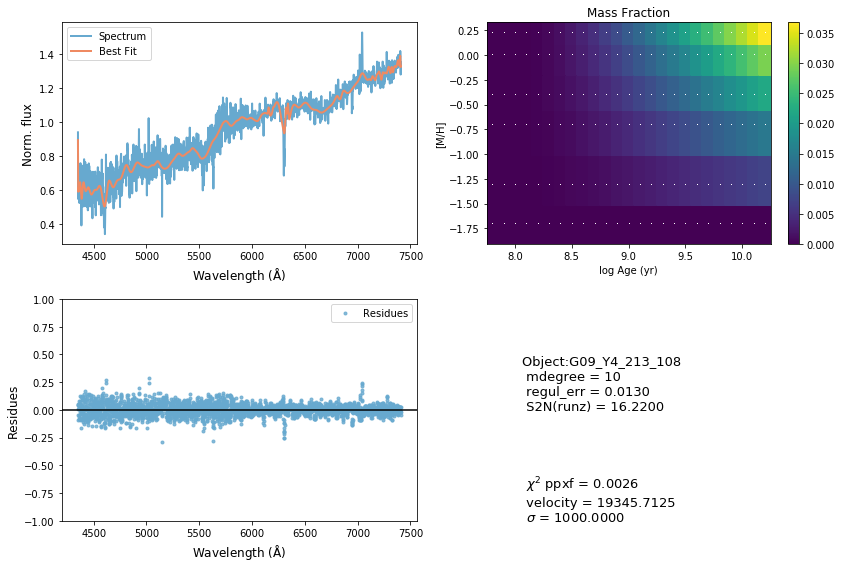

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     46530      1000    -0.007    -0.121
 comp. 1:     47302       337
 comp. 2:     47577        90
chi2/DOF: 0.002165
method = capfit ; Jac calls: 14 ; Func calls: 291 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  124  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.761       7.8   47302   337
Comp: 2       Unknown     0.4431       3.5   47577    90
Comp: 2       Unknown     0.4065       3.5   47577    90
Comp: 2       Unknown          0       2.9   47577    90
Comp: 2       Unknown    0.06338       2.8   47577    90
---------------------------------------------------------
Weighted <logAge> [yr]: 9.62
Weighted <[M/H]>: -0.192
Weighted <logAge> [yr]: 

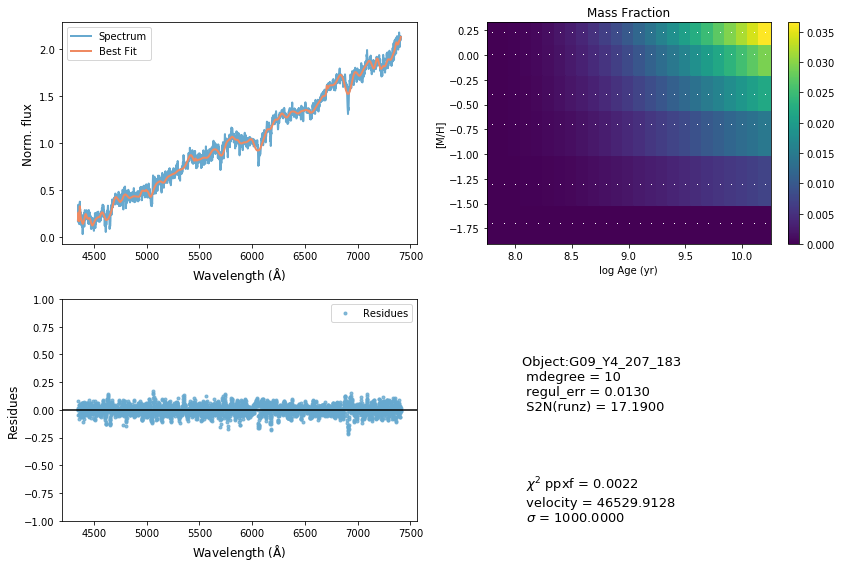

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     39443       600    -0.041    -0.020
 comp. 1:     39264       478
 comp. 2:     38512       180
chi2/DOF: 0.003988
method = capfit ; Jac calls: 13 ; Func calls: 263 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  126  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.575       7.1   39264   478
Comp: 2       Unknown          0         4   38512   180
Comp: 2       Unknown          0         3   38512   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.11
M/L_r: 1.234
Current $\chi^2$: 0.0040
Elapsed time in PPXF: 4.29 [min]


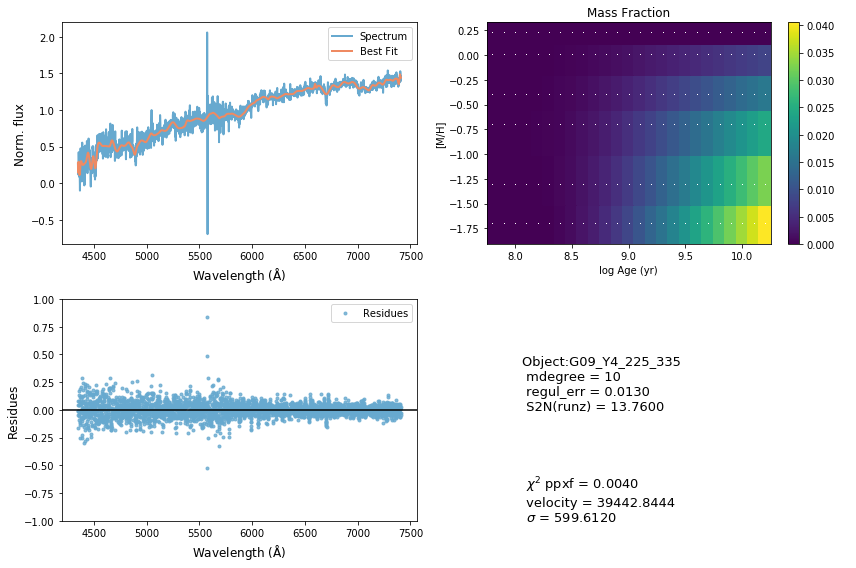

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     43426        35     0.000     0.001
 comp. 1:     43540       180
 comp. 2:     43638        98
chi2/DOF: 0.01719
method = capfit ; Jac calls: 10 ; Func calls: 205 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  77  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.6   43540   180
Comp: 2       Unknown     0.4021       3.2   43638    98
Comp: 2       Unknown     0.7749       1.8   43638    98
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -1.11
M/L_r: 1.906
Current $\chi^2$: 0.0172
Elapsed time in PPXF: 3.24 [min]


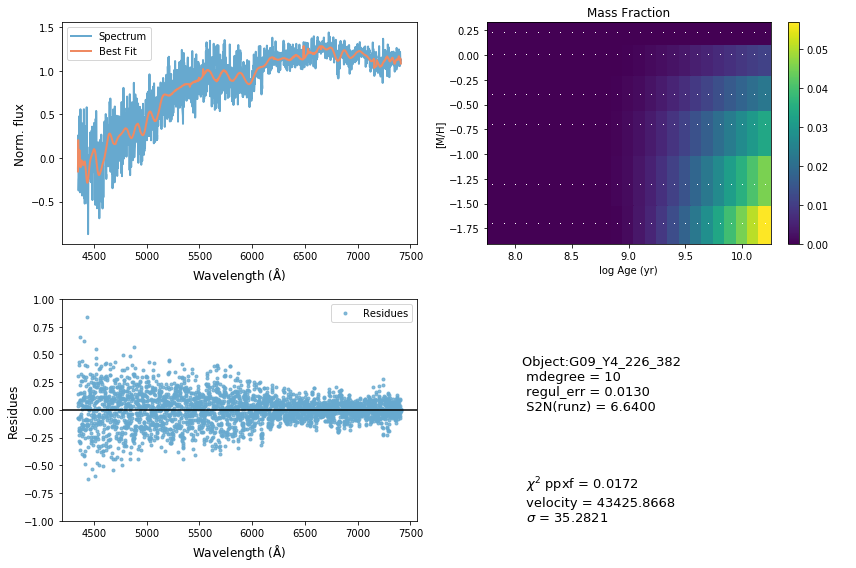

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     60755       186    -0.001    -0.002
 comp. 1:     60822       192
 comp. 2:     60678        99
chi2/DOF: 0.01448
method = capfit ; Jac calls: 5 ; Func calls: 105 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  105  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.391         4   60822   192
Comp: 2       Unknown          0       4.5   60678    99
Comp: 2       Unknown     0.5076       4.5   60678    99
Comp: 2       Unknown          0       3.3   60678    99
---------------------------------------------------------
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.651
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.651
M/L_r: 2.105
Current $\chi^2$: 0.0145
Elap

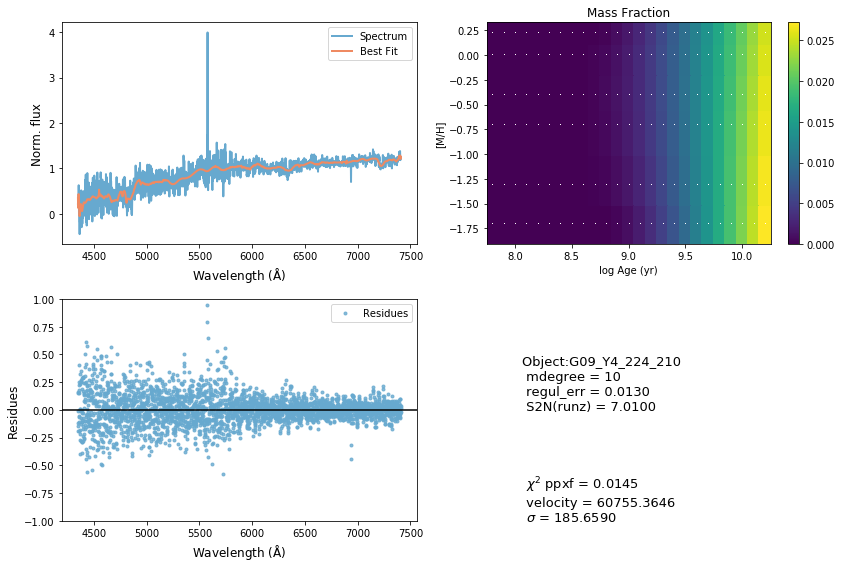

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     41036         1    -0.001    -0.002
 comp. 1:     43223        93
 comp. 2:     42468      1000
chi2/DOF: 0.002871
method = capfit ; Jac calls: 9 ; Func calls: 190 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  127  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.3616       2.9   43223    93
Comp: 2       Unknown          0       9.1   42468  1000
Comp: 2       Unknown      2.997       6.2   42468  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -1.08
Weighted <logAge> [yr]: 9.76
Weighted <[M/H]>: -1.08
M/L_r: 1.14
Current $\chi^2$: 0.0029
Elapsed time in PPXF: 3.21 [min]


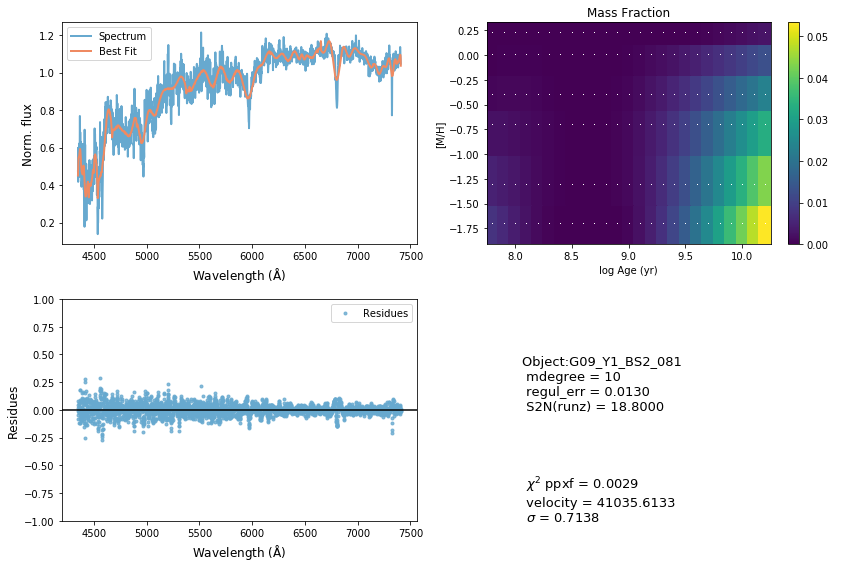

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47477       400    -0.027    -0.032
 comp. 1:     47218       117
 comp. 2:     47653        48
chi2/DOF: 0.006169
method = capfit ; Jac calls: 10 ; Func calls: 205 ; Status: 2
Gas Reddening E(B-V): 3.407
Nonzero Templates:  132  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.2706       1.7   47218   117
Comp: 2       Unknown     0.8222       3.8   47653    48
Comp: 2       Unknown      1.064       3.7   47653    48
Comp: 2       Unknown     0.6633       2.6   47653    48
Comp: 2       Unknown          0       1.7   47653    48
---------------------------------------------------------
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -0.197
Weighted <logAge> [yr]: 

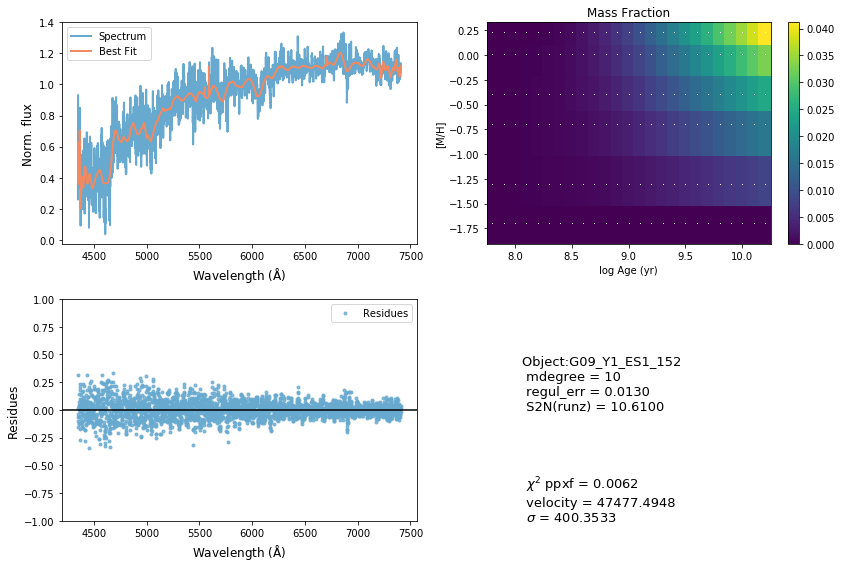

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     68947       224    -0.008    -0.003
 comp. 1:     68976       180
 comp. 2:     69134        84
chi2/DOF: 0.005873
method = capfit ; Jac calls: 9 ; Func calls: 185 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  89  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown    0.01411       1.9   68976   180
Comp: 2       Unknown          0       2.8   69134    84
Comp: 2       Unknown          0         1   69134    84
Comp: 2       Unknown     0.5732       3.6   69134    84
---------------------------------------------------------
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.234
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.234
M/L_r: 2.726
Current $\chi^2$: 0.0059
Ela

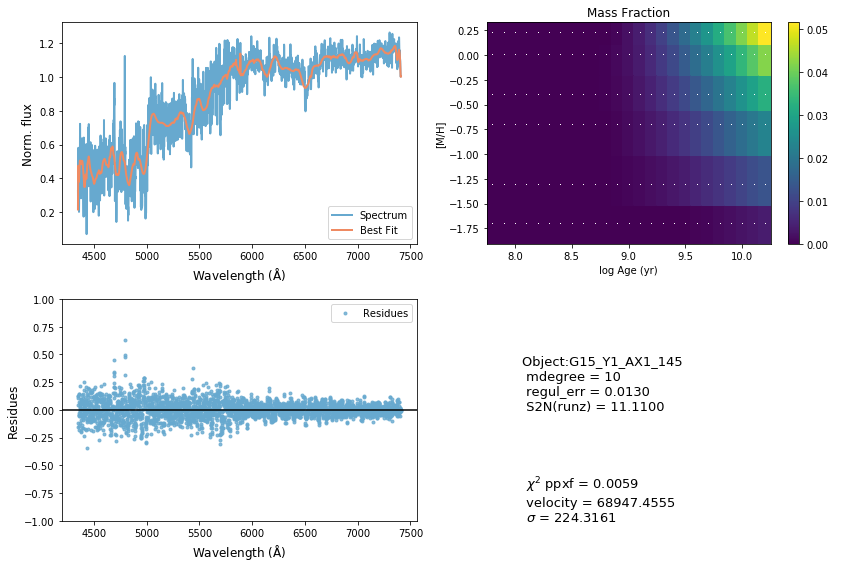

Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     26487       297    -0.000    -0.007
 comp. 1:     26107       182
 comp. 2:     25957       542
chi2/DOF: 0.003338
method = capfit ; Jac calls: 11 ; Func calls: 232 ; Status: 2
Gas Reddening E(B-V): 0.729
Nonzero Templates:  118  /  156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown       1.37         4   26107   182
Comp: 2       Unknown     0.4303       5.8   25957   542
Comp: 2       Unknown          0       5.6   25957   542
Comp: 2       Unknown          0       6.5   25957   542
Comp: 2       Unknown      2.654       5.9   25957   542
Comp: 2       Unknown          0         5   25957   542
---------------------------------------------------------
Weight

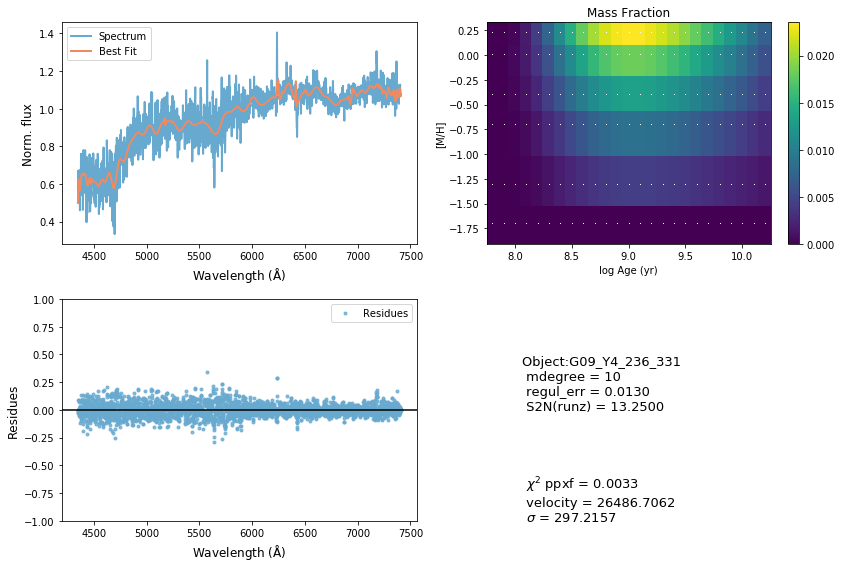

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     69889       178    -0.002    -0.002
 comp. 1:     69888       178
 comp. 2:     69889       180
chi2/DOF: 0.006244
method = capfit ; Jac calls: 1 ; Func calls: 28 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  66  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.2586       5.2   69888   178
Comp: 2       Unknown          0       5.7   69889   180
Comp: 2       Unknown          0       5.7   69889   180
Comp: 2       Unknown          0       3.4   69889   180
---------------------------------------------------------
Weighted <logAge> [yr]: 8.93
Weighted <[M/H]>: -0.0622
Weighted <logAge> [yr]: 8.93
Weighted <[M/H]>: -0.0622
M/L_r: 0.6736
Current $\chi^2$: 0.0062
El

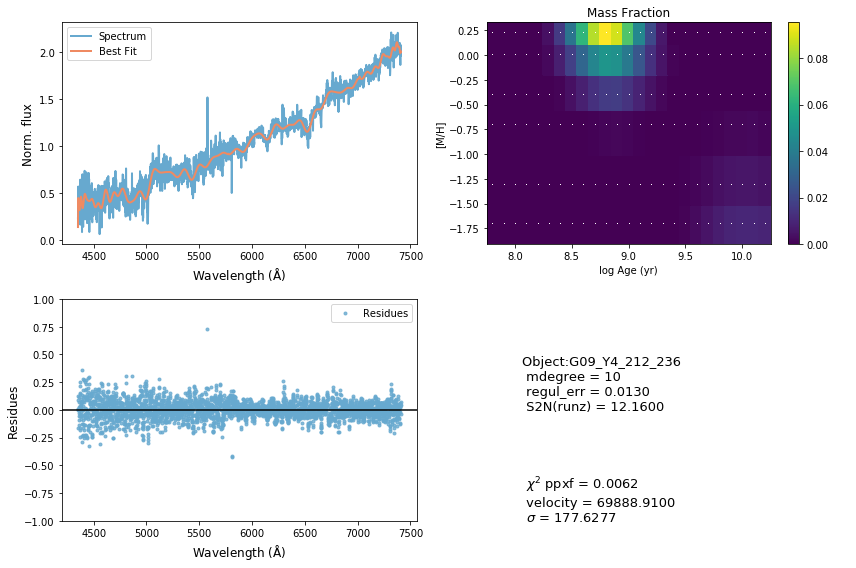

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     53201        25    -0.021    -0.000
 comp. 1:     53637        46
 comp. 2:     53875       206
chi2/DOF: 0.00614
method = capfit ; Jac calls: 17 ; Func calls: 354 ; Status: 2
Gas Reddening E(B-V): 4.404
Nonzero Templates:  110  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1085       1.1   53637    46
Comp: 2       Unknown          0       9.3   53875   206
Comp: 2       Unknown      7.177       8.9   53875   206
Comp: 2       Unknown      1.082       5.8   53875   206
---------------------------------------------------------
Weighted <logAge> [yr]: 8.88
Weighted <[M/H]>: -0.843
Weighted <logAge> [yr]: 8.88
Weighted <[M/H]>: -0.843
M/L_r: 0.4458
Current $\chi^2$: 0.0061
El

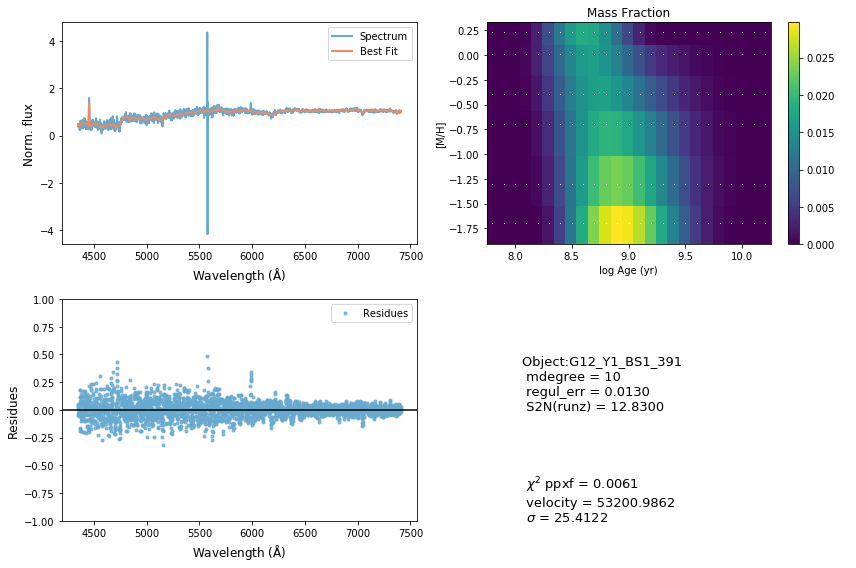

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     42999         1    -0.006    -0.002
 comp. 1:     42793       536
 comp. 2:     42779        72
chi2/DOF: 0.01589
method = capfit ; Jac calls: 9 ; Func calls: 186 ; Status: 2
Gas Reddening E(B-V): 3.953
Nonzero Templates:  73  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.466       3.1   42793   536
Comp: 2       Unknown      0.463       2.7   42779    72
Comp: 2       Unknown    0.08393       1.7   42779    72
---------------------------------------------------------
Weighted <logAge> [yr]: 9.89
Weighted <[M/H]>: -0.195
Weighted <logAge> [yr]: 9.89
Weighted <[M/H]>: -0.195
M/L_r: 3.132
Current $\chi^2$: 0.0159
Elapsed time in PPXF: 3.05 [min]


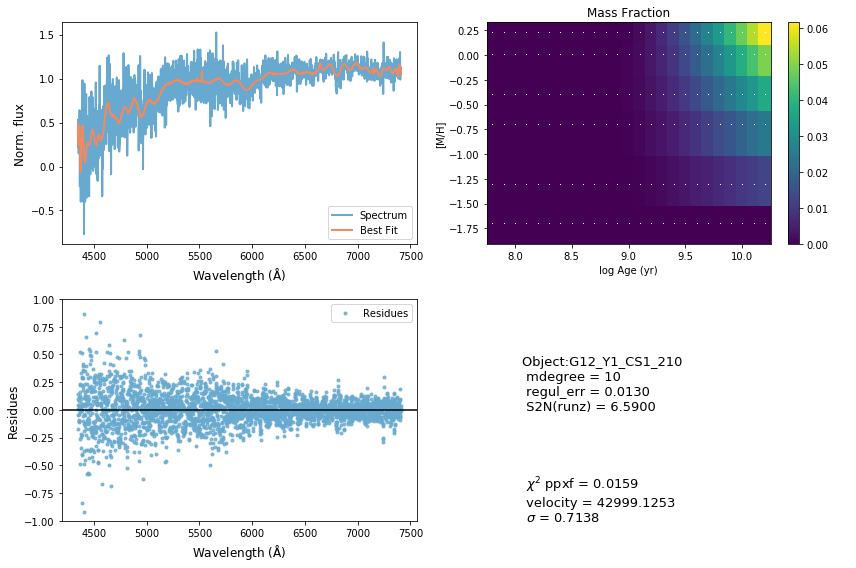

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     30740       326    -0.008    -0.007
 comp. 1:     30721      1000
 comp. 2:     30431       112
chi2/DOF: 0.01037
method = capfit ; Jac calls: 12 ; Func calls: 249 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  133  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      11.28       9.9   30721  1000
Comp: 2       Unknown      1.639       3.4   30431   112
Comp: 2       Unknown          0       2.7   30431   112
Comp: 2       Unknown          0       2.1   30431   112
---------------------------------------------------------
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.446
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.446
M/L_r: 1.676
Current $\chi^2$: 0.0104


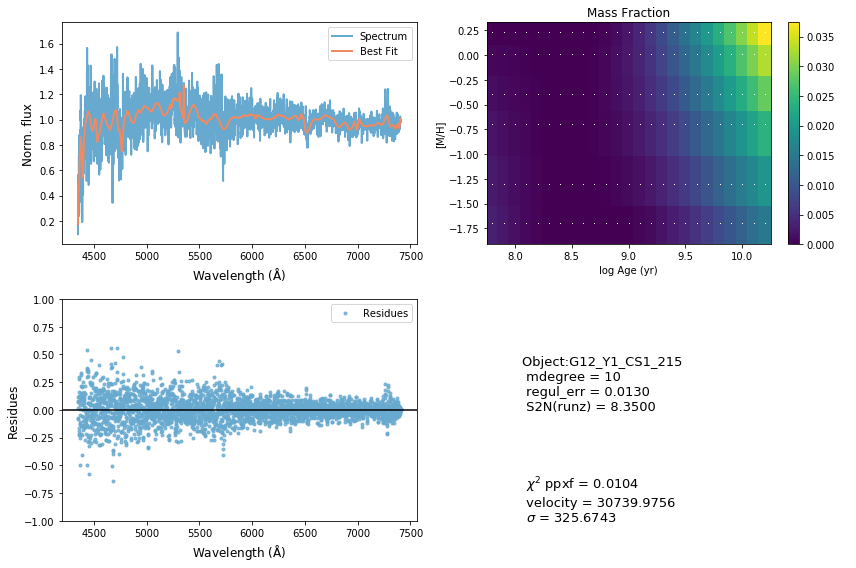

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     75273       219    -0.002    -0.002
 comp. 1:     75271       180
 comp. 2:     75268       182
chi2/DOF: 0.003362
method = capfit ; Jac calls: 1 ; Func calls: 28 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  20  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.7   75271   180
Comp: 2       Unknown     0.4639       5.7   75268   182
Comp: 2       Unknown     0.3084       5.7   75268   182
Comp: 2       Unknown     0.1524       3.9   75268   182
---------------------------------------------------------
Weighted <logAge> [yr]: 8.26
Weighted <[M/H]>: 0.14
Weighted <logAge> [yr]: 8.26
Weighted <[M/H]>: 0.14
M/L_r: 0.2952
Current $\chi^2$: 0.0034
Elapsed 

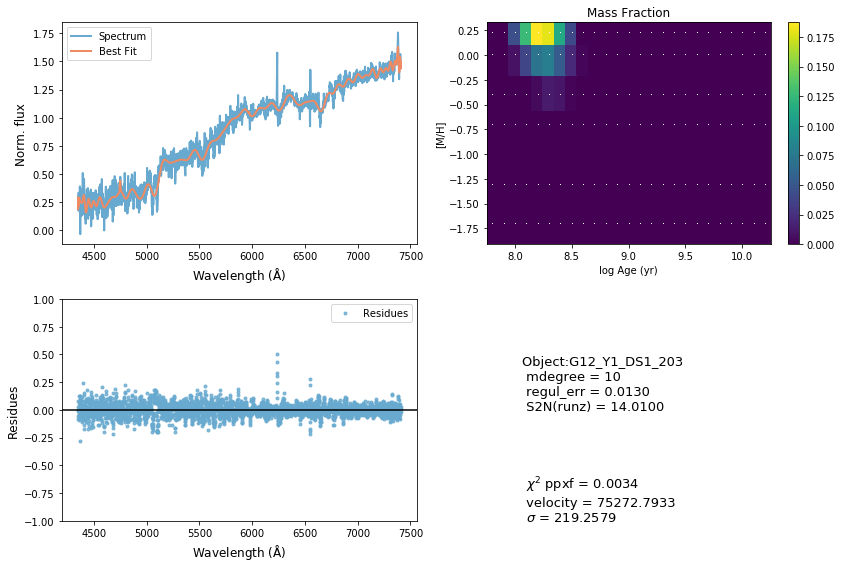

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     59129       181    -0.001    -0.001
 comp. 1:     59130       180
 comp. 2:     59130       180
chi2/DOF: 0.01145
method = capfit ; Jac calls: 1 ; Func calls: 29 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  74  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       5.4   59130   180
Comp: 2       Unknown          0       5.8   59130   180
Comp: 2       Unknown          0       5.8   59130   180
Comp: 2       Unknown      1.009       4.4   59130   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.88
Weighted <[M/H]>: -0.196
Weighted <logAge> [yr]: 9.88
Weighted <[M/H]>: -0.196
M/L_r: 3.014
Current $\chi^2$: 0.0115
Elapse

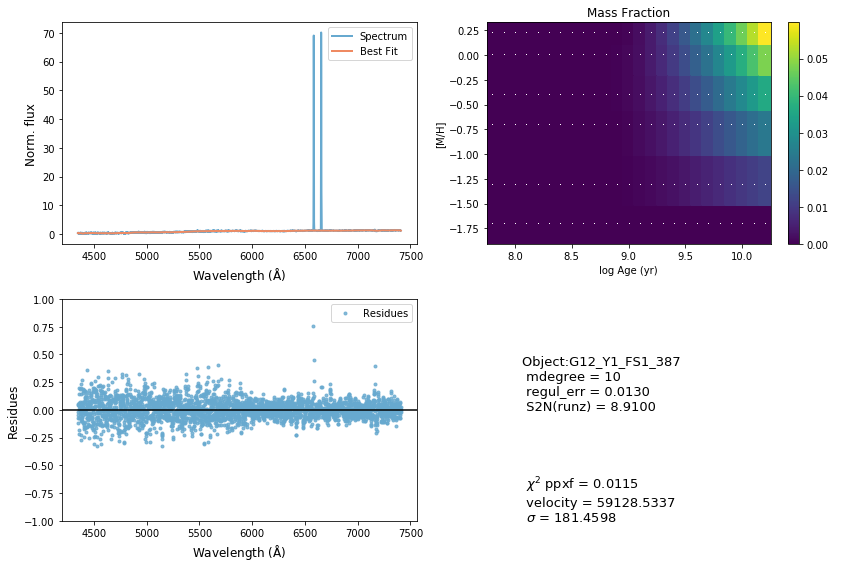

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47760      1000     0.153     0.005
 comp. 1:     45774       180
 comp. 2:     45635       150
chi2/DOF: 0.007612
method = capfit ; Jac calls: 8 ; Func calls: 169 ; Status: 4
Gas Reddening E(B-V): 10.000
Nonzero Templates:  121  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0         2   45774   180
Comp: 2       Unknown      1.097       3.6   45635   150
Comp: 2       Unknown          0       2.5   45635   150
---------------------------------------------------------
Weighted <logAge> [yr]: 9.66
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 9.66
Weighted <[M/H]>: -1.11
M/L_r: 1.125
Current $\chi^2$: 0.0076
Elapsed time in PPXF: 3.57 [min]


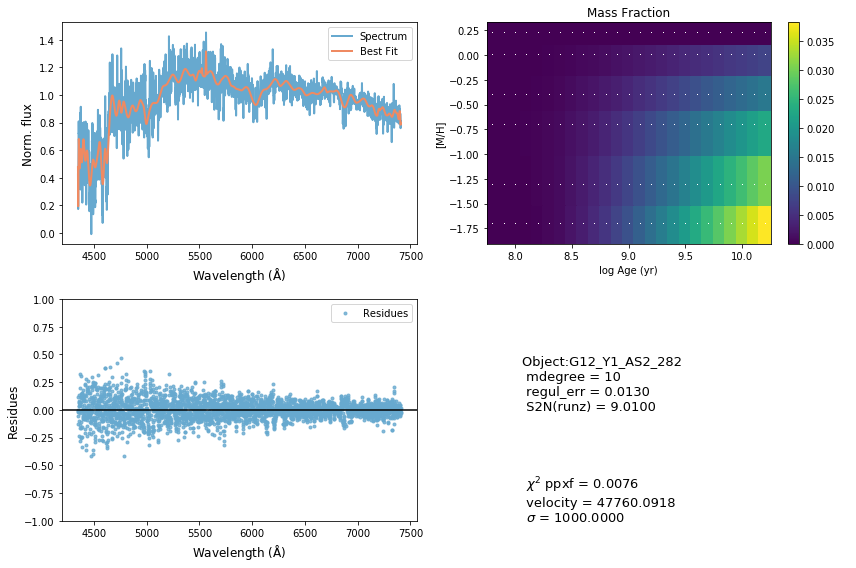

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     53563       263     0.067     0.002
 comp. 1:     53771       343
 comp. 2:     53912      1000
chi2/DOF: 0.003928
method = capfit ; Jac calls: 10 ; Func calls: 212 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  42  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.328       5.4   53771   343
Comp: 2       Unknown      15.33        79   53912  1000
Comp: 2       Unknown          0        78   53912  1000
Comp: 2       Unknown      5.104        11   53912  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 7.93
Weighted <[M/H]>: -1.15
Weighted <logAge> [yr]: 7.93
Weighted <[M/H]>: -1.15
M/L_r: 0.1593
Current $\chi^2$: 0.0039
Elap

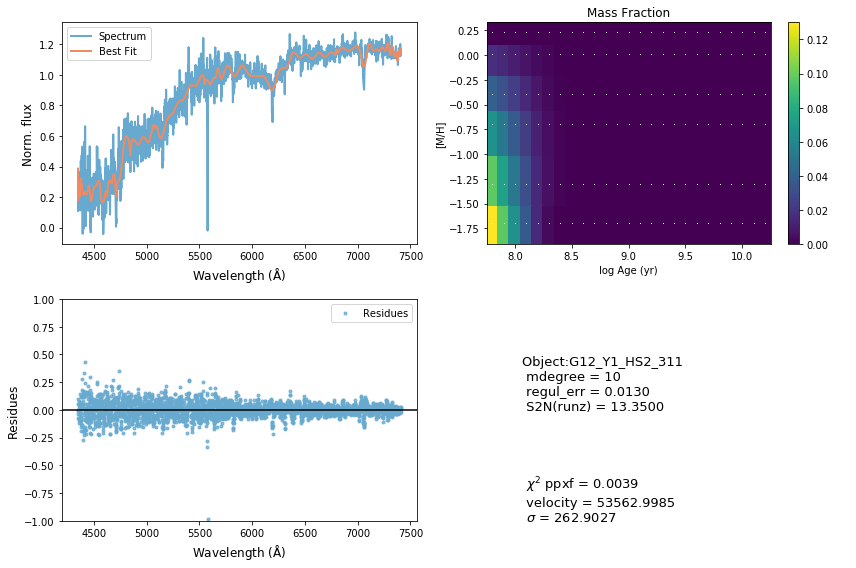

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     39686       204     0.020    -0.001
 comp. 1:     39611       384
 comp. 2:     38688      1000
chi2/DOF: 0.003544
method = capfit ; Jac calls: 22 ; Func calls: 452 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  112  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      2.169       6.1   39611   384
Comp: 2       Unknown      2.458       8.8   38688  1000
Comp: 2       Unknown          0       6.3   38688  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 9.61
Weighted <[M/H]>: -1.12
Weighted <logAge> [yr]: 9.61
Weighted <[M/H]>: -1.12
M/L_r: 1.058
Current $\chi^2$: 0.0035
Elapsed time in PPXF: 7.25 [min]


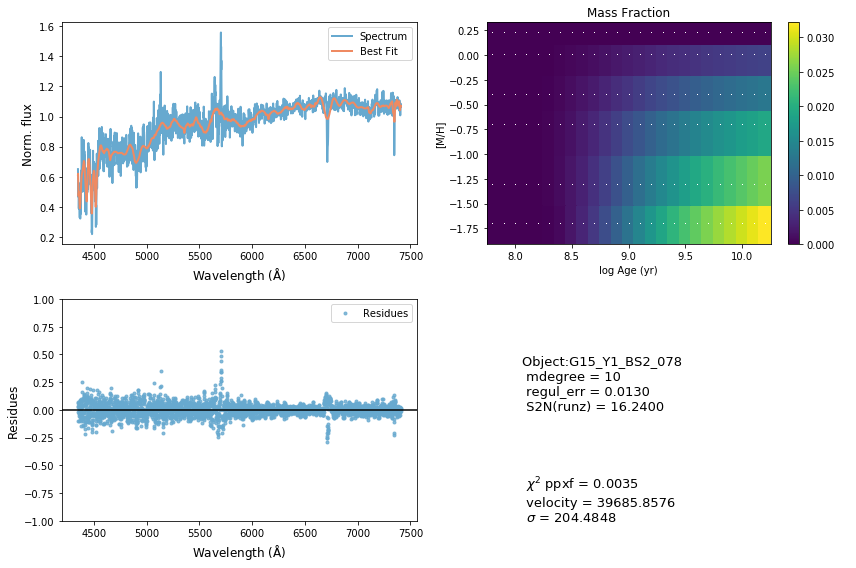

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     54620       762    -0.017    -0.044
 comp. 1:     52879        31
 comp. 2:     53254       124
chi2/DOF: 0.007131
method = capfit ; Jac calls: 18 ; Func calls: 364 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  113  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1453       1.9   52879    31
Comp: 2       Unknown     0.2974       6.9   53254   124
Comp: 2       Unknown       2.21         7   53254   124
Comp: 2       Unknown          0         4   53254   124
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.24
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.24
M/L_r: 2.12
Current $\chi^2$: 0.0071
Elaps

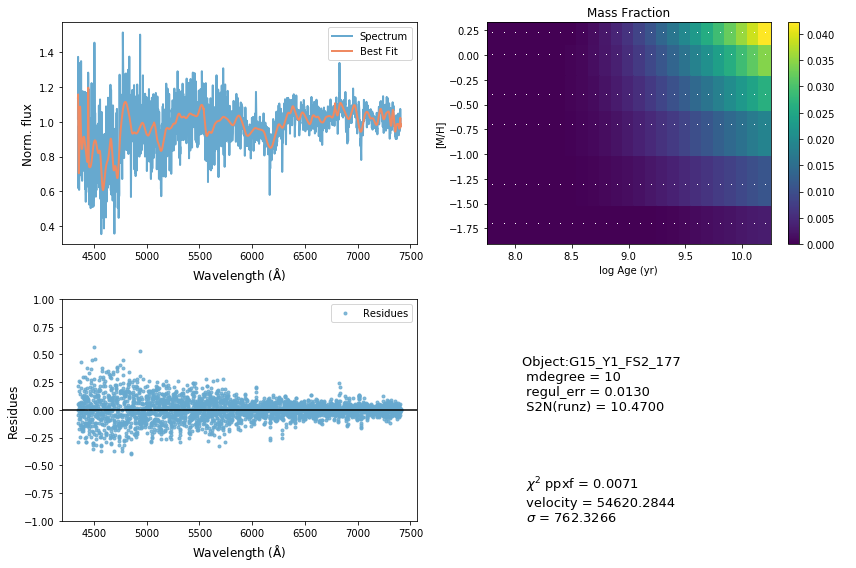

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51579       121    -0.000     0.001
 comp. 1:     51494        69
 comp. 2:     51944       172
chi2/DOF: 0.01513
method = capfit ; Jac calls: 10 ; Func calls: 205 ; Status: 2
Gas Reddening E(B-V): 5.641
Nonzero Templates:  143  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.5742       1.1   51494    69
Comp: 2       Unknown          0       6.6   51944   172
Comp: 2       Unknown      2.349       3.1   51944   172
Comp: 2       Unknown     0.4152       4.4   51944   172
---------------------------------------------------------
Weighted <logAge> [yr]: 9.77
Weighted <[M/H]>: -0.21
Weighted <logAge> [yr]: 9.77
Weighted <[M/H]>: -0.21
M/L_r: 2.074
Current $\chi^2$: 0.0151
Elaps

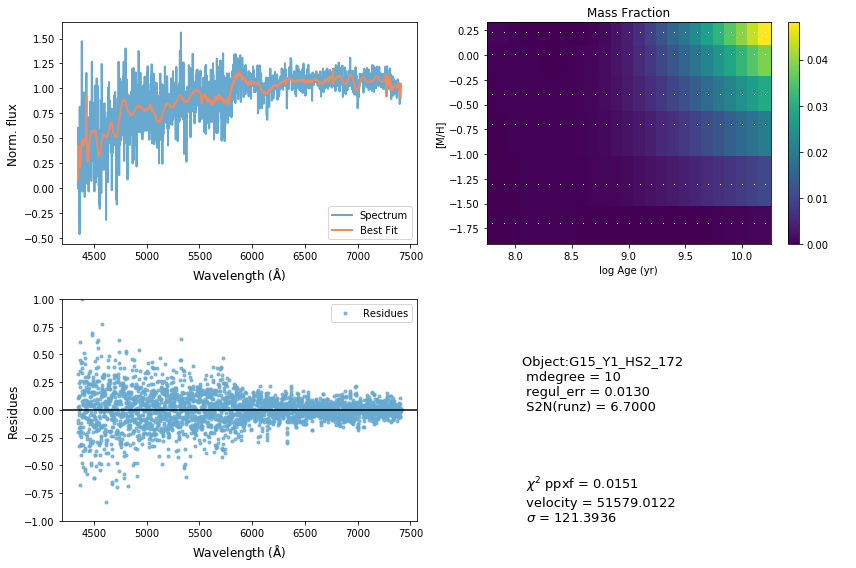

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     43712       492    -0.002    -0.000
 comp. 1:     45458       180
 comp. 2:     45310        94
chi2/DOF: 0.006245
method = capfit ; Jac calls: 10 ; Func calls: 205 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  135  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.4   45458   180
Comp: 2       Unknown       1.69       3.4   45310    94
Comp: 2       Unknown          0       1.7   45310    94
---------------------------------------------------------
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.279
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.279
M/L_r: 1.974
Current $\chi^2$: 0.0062
Elapsed time in PPXF: 3.28 [min]


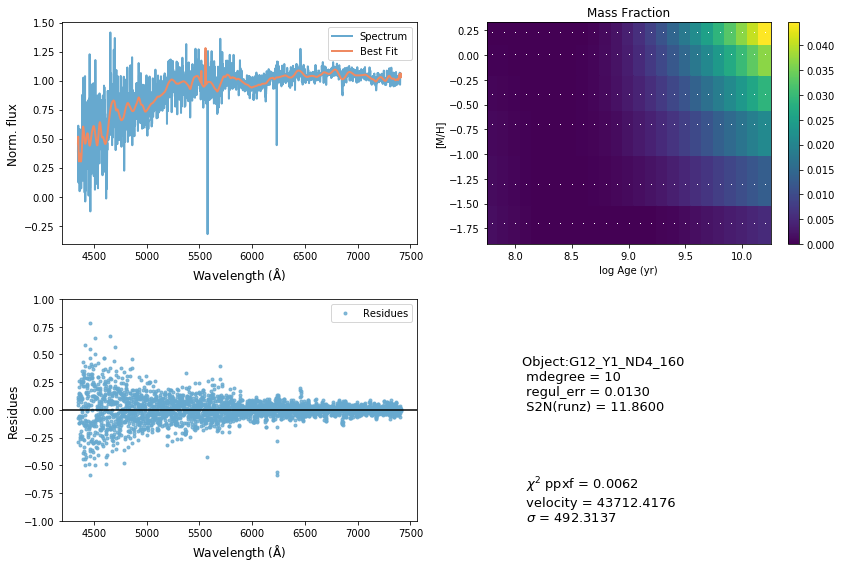

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     49321       207    -0.001    -0.000
 comp. 1:     49203       180
 comp. 2:     49276       233
chi2/DOF: 0.007137
method = capfit ; Jac calls: 12 ; Func calls: 250 ; Status: 2
Gas Reddening E(B-V): 4.857
Nonzero Templates:  86  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       1.8   49203   180
Comp: 2       Unknown          0       9.6   49276   233
Comp: 2       Unknown      4.591       7.9   49276   233
Comp: 2       Unknown          0       4.7   49276   233
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.229
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.229
M/L_r: 2.848
Current $\chi^2$: 0.0071
Ela

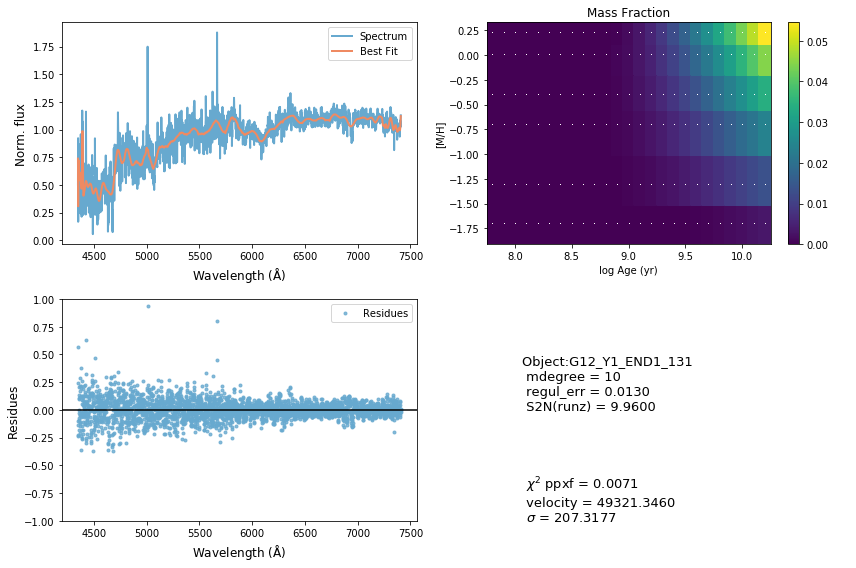

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     55303       368     0.046    -0.051
 comp. 1:     55827       257
 comp. 2:     55533       184
chi2/DOF: 0.007625
method = capfit ; Jac calls: 7 ; Func calls: 148 ; Status: 4
Gas Reddening E(B-V): 9.307
Nonzero Templates:  28  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.4162       2.5   55827   257
Comp: 2       Unknown     0.8748   1.3e+03   55533   184
Comp: 2       Unknown          0   1.3e+03   55533   184
Comp: 2       Unknown          0       4.3   55533   184
---------------------------------------------------------
Weighted <logAge> [yr]: 7.89
Weighted <[M/H]>: -1.15
Weighted <logAge> [yr]: 7.89
Weighted <[M/H]>: -1.15
M/L_r: 0.158
Current $\chi^2$: 0.0076
Elapse

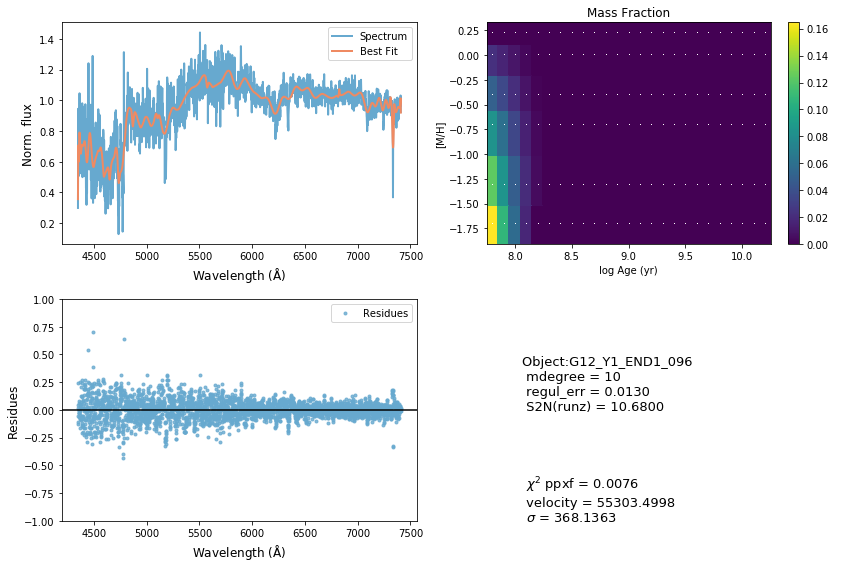

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     54476       485    -0.038    -0.001
 comp. 1:     55107       465
 comp. 2:     55008       180
chi2/DOF: 0.003736
method = capfit ; Jac calls: 13 ; Func calls: 267 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  39  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.848       6.8   55107   465
Comp: 2       Unknown          0       5.8   55008   180
Comp: 2       Unknown          0       5.8   55008   180
Comp: 2       Unknown          0       5.3   55008   180
---------------------------------------------------------
Weighted <logAge> [yr]: 7.94
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 7.94
Weighted <[M/H]>: -1.11
M/L_r: 0.1596
Current $\chi^2$: 0.0037
Elap

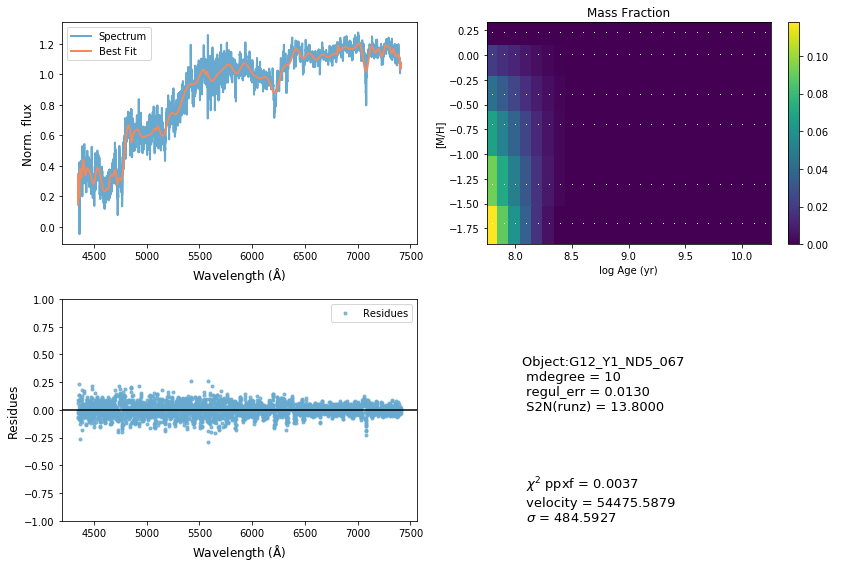

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     41676       182    -0.002    -0.002
 comp. 1:     41675       182
 comp. 2:     41673       180
chi2/DOF: 0.005607
method = capfit ; Jac calls: 1 ; Func calls: 28 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  71  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1498       3.7   41675   182
Comp: 2       Unknown          0       4.4   41673   180
Comp: 2       Unknown          0       2.5   41673   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.91
Weighted <[M/H]>: -0.21
Weighted <logAge> [yr]: 9.91
Weighted <[M/H]>: -0.21
M/L_r: 3.248
Current $\chi^2$: 0.0056
Elapsed time in PPXF: 0.66 [min]


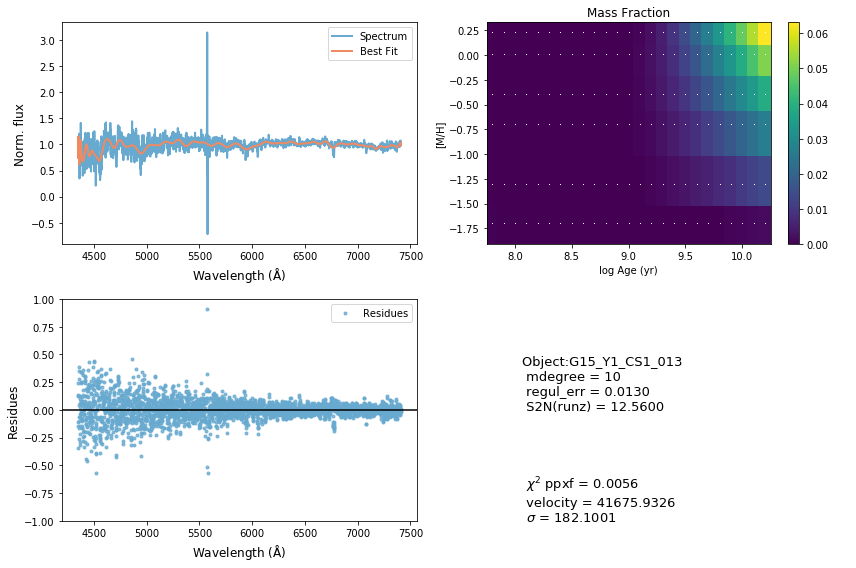

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     74850       403     0.008     0.001
 comp. 1:     74456       180
 comp. 2:     74826       135
chi2/DOF: 0.0191
method = capfit ; Jac calls: 10 ; Func calls: 206 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  83  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.2   74456   180
Comp: 2       Unknown      2.675       8.4   74826   135
Comp: 2       Unknown          0       6.6   74826   135
Comp: 2       Unknown      1.535       2.9   74826   135
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.228
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.228
M/L_r: 2.884
Current $\chi^2$: 0.0191
Elaps

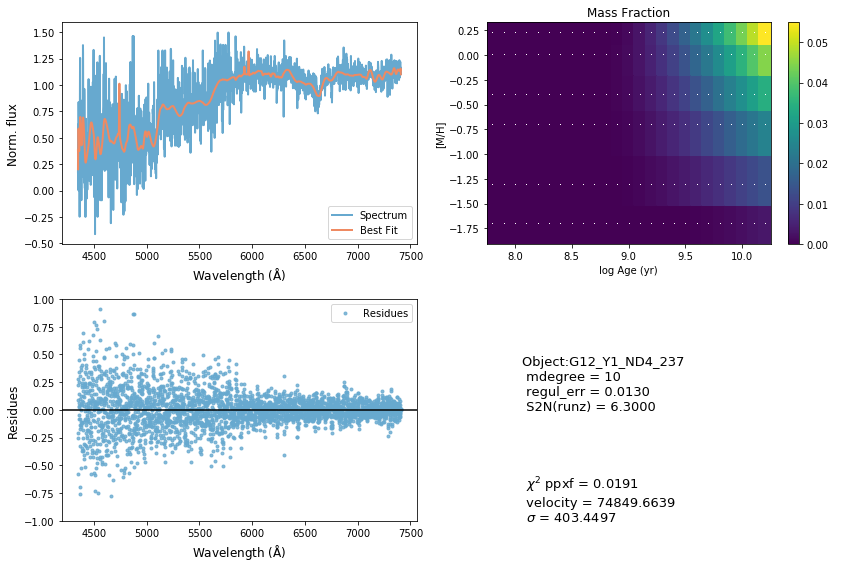

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     60663      1000    -0.045     0.072
 comp. 1:     60998       652
 comp. 2:     60817        54
chi2/DOF: 0.003929
method = capfit ; Jac calls: 12 ; Func calls: 250 ; Status: 4
Gas Reddening E(B-V): 0.000
Nonzero Templates:  142  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      5.811         8   60998   652
Comp: 2       Unknown     0.9779       4.5   60817    54
Comp: 2       Unknown          0       4.2   60817    54
Comp: 2       Unknown     0.3841       2.7   60817    54
---------------------------------------------------------
Weighted <logAge> [yr]: 9.6
Weighted <[M/H]>: -0.936
Weighted <logAge> [yr]: 9.6
Weighted <[M/H]>: -0.936
M/L_r: 1.005
Current $\chi^2$: 0.0039
Elap

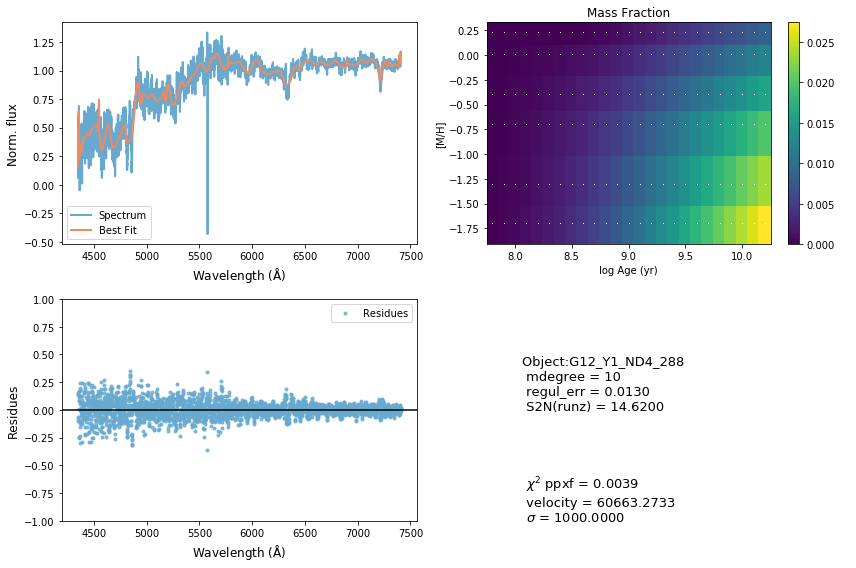

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     50726       825     0.069    -0.037
 comp. 1:     50407       180
 comp. 2:     50415       244
chi2/DOF: 0.005516
method = capfit ; Jac calls: 6 ; Func calls: 128 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  112  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.5   50407   180
Comp: 2       Unknown          0       8.9   50415   244
Comp: 2       Unknown     0.7666       9.1   50415   244
Comp: 2       Unknown      1.146       5.4   50415   244
---------------------------------------------------------
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.328
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.328
M/L_r: 2.203
Current $\chi^2$: 0.0055
Ela

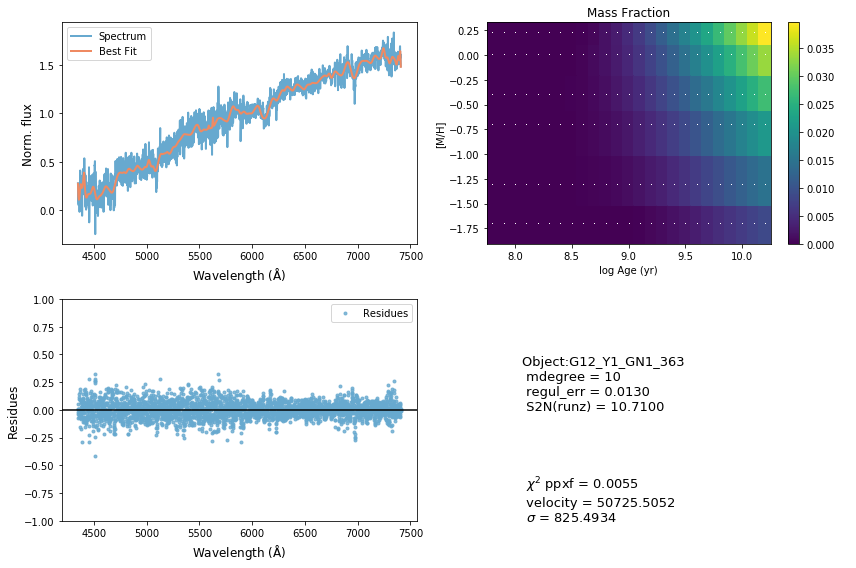

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     51767      1000    -0.070     0.012
 comp. 1:     50953       180
 comp. 2:     50934         1
chi2/DOF: 0.009445
method = capfit ; Jac calls: 9 ; Func calls: 188 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  134  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.3   50953   180
Comp: 2       Unknown          0       2.9   50934     1
Comp: 2       Unknown    0.03398       2.9   50934     1
Comp: 2       Unknown     0.3682       2.5   50934     1
---------------------------------------------------------
Weighted <logAge> [yr]: 9.71
Weighted <[M/H]>: -0.377
Weighted <logAge> [yr]: 9.71
Weighted <[M/H]>: -0.377
M/L_r: 1.761
Current $\chi^2$: 0.0094
Ela

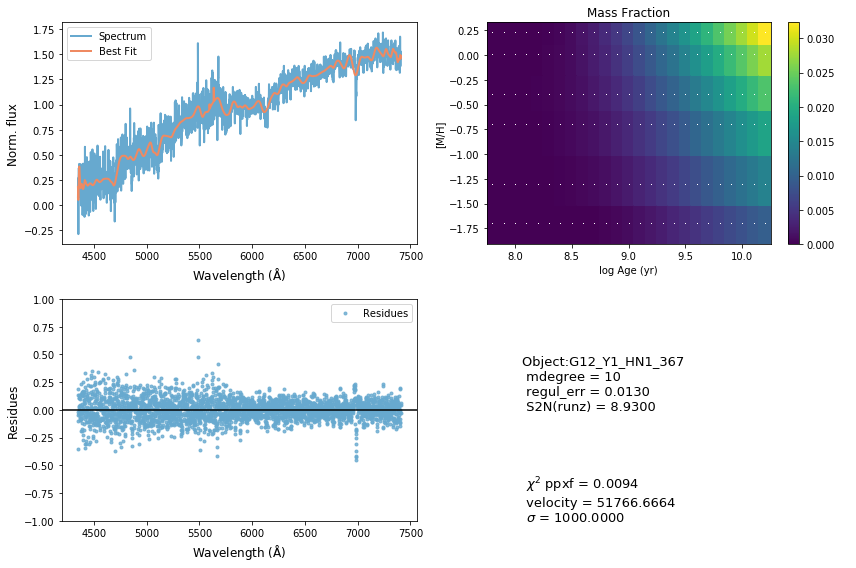

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     68909       185     0.001    -0.002
 comp. 1:     69051       276
 comp. 2:     68594       116
chi2/DOF: 0.01289
method = capfit ; Jac calls: 9 ; Func calls: 190 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  77  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.031       4.9   69051   276
Comp: 2       Unknown      1.065       4.3   68594   116
Comp: 2       Unknown          0       4.2   68594   116
Comp: 2       Unknown     0.9278         3   68594   116
---------------------------------------------------------
Weighted <logAge> [yr]: 9.87
Weighted <[M/H]>: -0.194
Weighted <logAge> [yr]: 9.87
Weighted <[M/H]>: -0.194
M/L_r: 2.991
Current $\chi^2$: 0.0129
Elaps

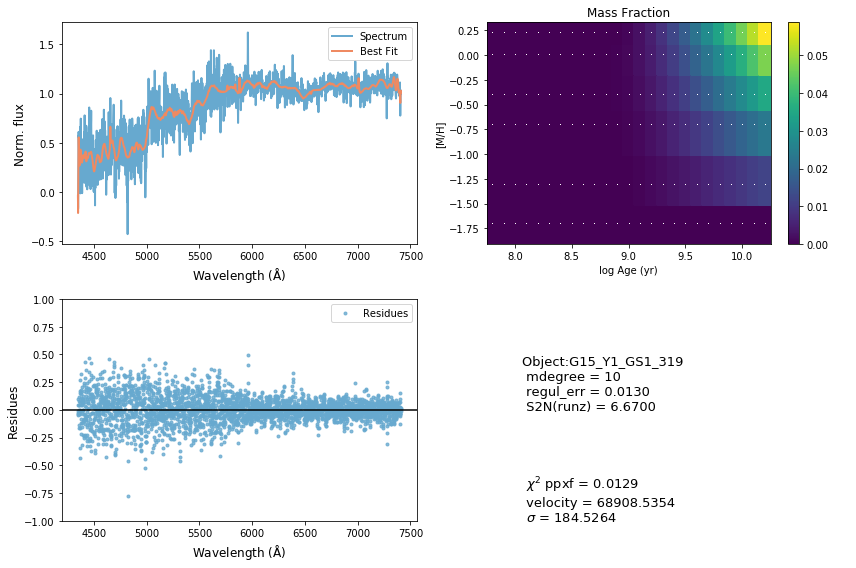

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     64177       156    -0.003     0.001
 comp. 1:     64268       356
 comp. 2:     63920       180
chi2/DOF: 0.05174
method = capfit ; Jac calls: 13 ; Func calls: 267 ; Status: 2
Gas Reddening E(B-V): 5.791
Nonzero Templates:  87  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      3.483       2.7   64268   356
Comp: 2       Unknown          0       6.8   63920   180
Comp: 2       Unknown          0       6.8   63920   180
Comp: 2       Unknown    0.01317       4.1   63920   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.83
Weighted <[M/H]>: -0.197
Weighted <logAge> [yr]: 9.83
Weighted <[M/H]>: -0.197
M/L_r: 2.689
Current $\chi^2$: 0.0517
Elap

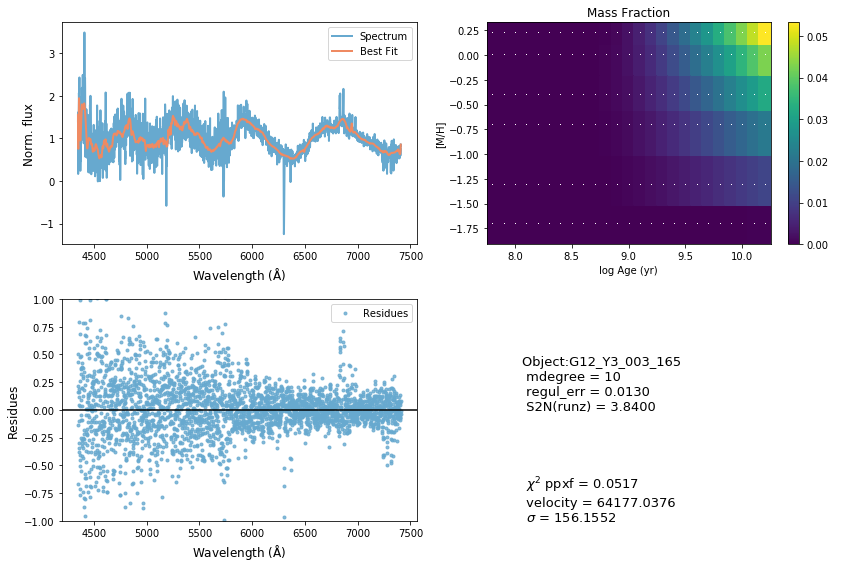

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47436       467    -0.023     0.002
 comp. 1:     47245       398
 comp. 2:     47429        89
chi2/DOF: 0.003669
method = capfit ; Jac calls: 6 ; Func calls: 130 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  83  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      1.311       5.8   47245   398
Comp: 2       Unknown    0.08245       4.2   47429    89
Comp: 2       Unknown          0       4.1   47429    89
Comp: 2       Unknown          0       3.4   47429    89
Comp: 2       Unknown     0.0748       1.9   47429    89
---------------------------------------------------------
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.194
Weighted <logAge> [yr]: 9.

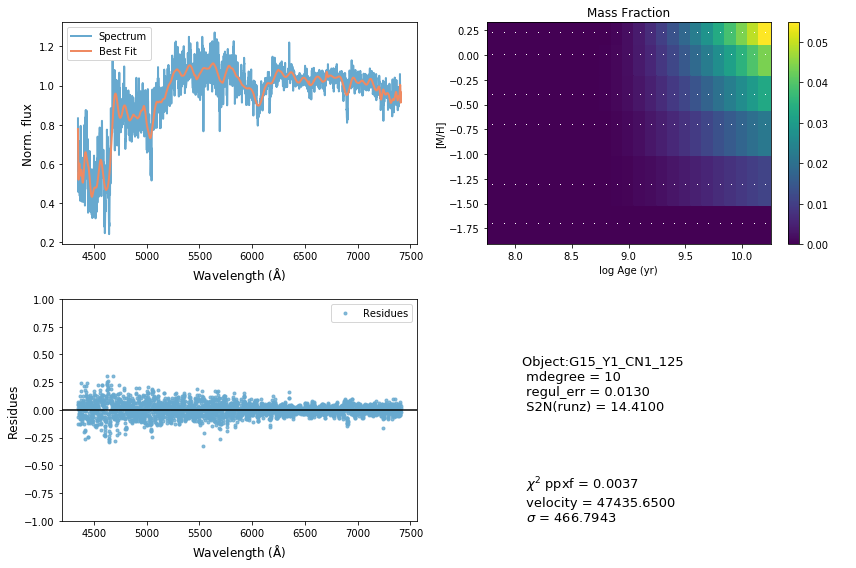

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     35325        48     0.000     0.003
 comp. 1:     35051       186
 comp. 2:     35483       159
chi2/DOF: 0.004851
method = capfit ; Jac calls: 18 ; Func calls: 367 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  118  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.5918       3.8   35051   186
Comp: 2       Unknown      1.053       3.3   35483   159
Comp: 2       Unknown          0         3   35483   159
Comp: 2       Unknown          0       2.9   35483   159
---------------------------------------------------------
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -1.02
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -1.02
M/L_r: 1.204
Current $\chi^2$: 0.0049


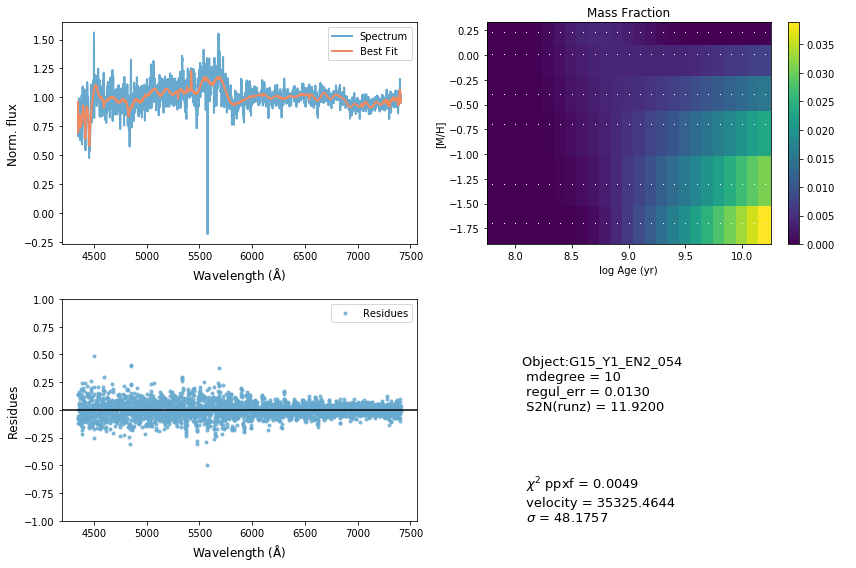

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     40276       655     0.005    -0.136
 comp. 1:     39373       180
 comp. 2:     39373       180
chi2/DOF: 0.003158
method = capfit ; Jac calls: 17 ; Func calls: 343 ; Status: 3
Gas Reddening E(B-V): 0.000
Nonzero Templates:  135  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.2   39373   180
Comp: 2       Unknown          0         4   39373   180
Comp: 2       Unknown          0       2.9   39373   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -0.841
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -0.841
M/L_r: 1.346
Current $\chi^2$: 0.0032
Elapsed time in PPXF: 5.81 [min]


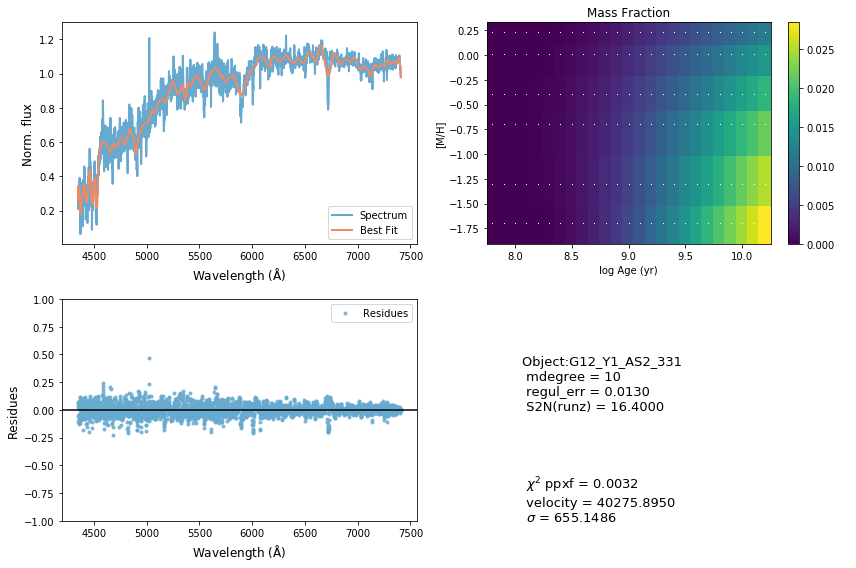

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47800      1000    -0.000    -0.000
 comp. 1:     49800       180
 comp. 2:     49801       181
chi2/DOF: 0.003487
method = capfit ; Jac calls: 1 ; Func calls: 29 ; Status: 2
Gas Reddening E(B-V): 1.308
Nonzero Templates:  4  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0         3   49800   180
Comp: 2       Unknown          0       6.5   49801   181
Comp: 2       Unknown      1.093       6.7   49801   181
Comp: 2       Unknown          0       4.7   49801   181
---------------------------------------------------------
Weighted <logAge> [yr]: 7.98
Weighted <[M/H]>: -1.71
Weighted <logAge> [yr]: 7.98
Weighted <[M/H]>: -1.71
M/L_r: 0.1962
Current $\chi^2$: 0.0035
Elapsed

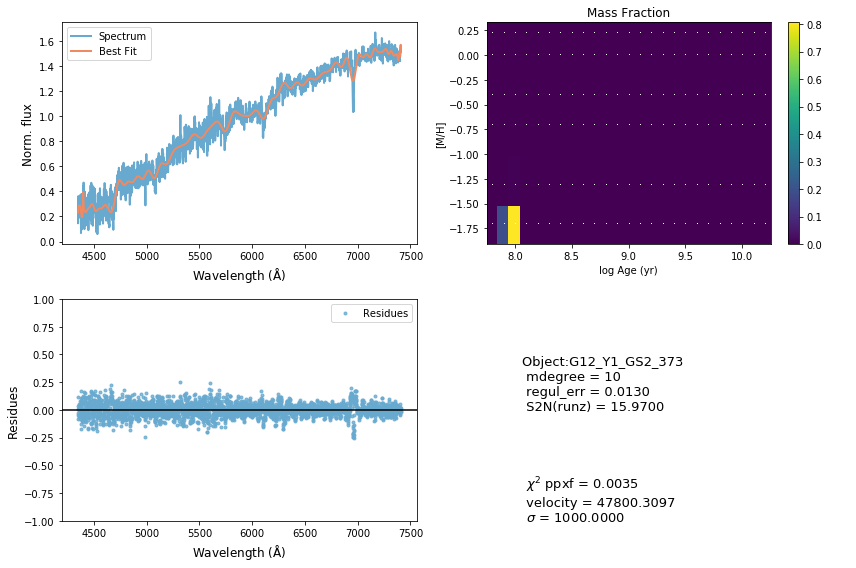

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     52217       519    -0.004     0.006
 comp. 1:     53883        86
 comp. 2:     54357       258
chi2/DOF: 0.007942
method = capfit ; Jac calls: 10 ; Func calls: 207 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  78  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.7868       2.7   53883    86
Comp: 2       Unknown          0        11   54357   258
Comp: 2       Unknown       4.96        11   54357   258
Comp: 2       Unknown      1.389       6.1   54357   258
---------------------------------------------------------
Weighted <logAge> [yr]: 7.96
Weighted <[M/H]>: -1.14
Weighted <logAge> [yr]: 7.96
Weighted <[M/H]>: -1.14
M/L_r: 0.1597
Current $\chi^2$: 0.0079
Elap

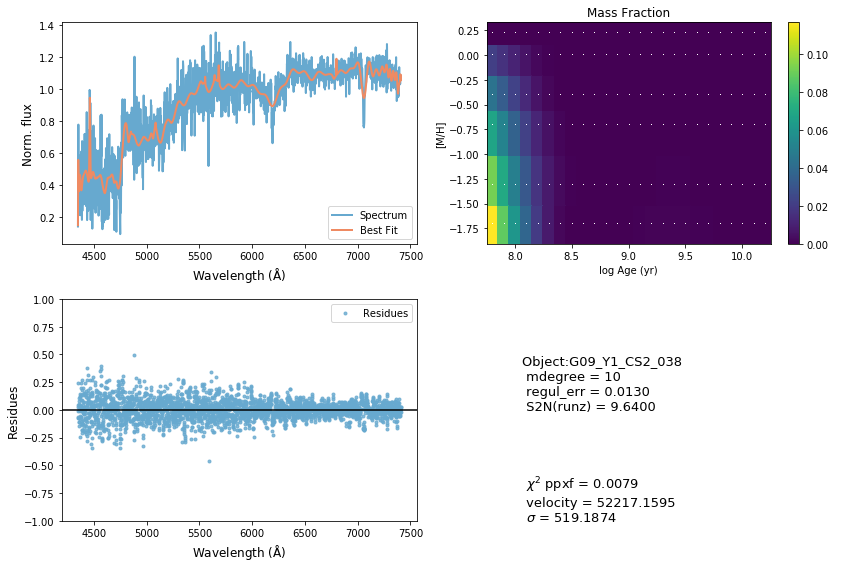

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     47457       462    -0.002    -0.004
 comp. 1:     47491       136
 comp. 2:     47645        30
chi2/DOF: 0.004289
method = capfit ; Jac calls: 8 ; Func calls: 169 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  99  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.8088       3.9   47491   136
Comp: 2       Unknown     0.5156       2.9   47645    30
Comp: 2       Unknown     0.1957       2.9   47645    30
Comp: 2       Unknown    0.09606       2.5   47645    30
Comp: 2       Unknown          0       1.7   47645    30
---------------------------------------------------------
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.269
Weighted <logAge> [yr]: 9.

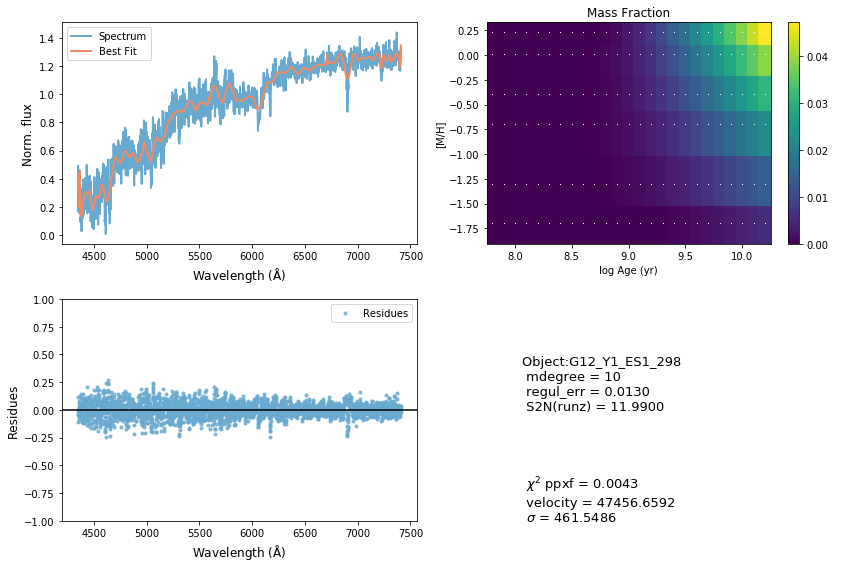

Emission lines included in gas templates:
['Balmer' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     46058       282     0.001    -0.000
 comp. 1:     46432       180
 comp. 2:     46530       145
chi2/DOF: 0.01286
method = capfit ; Jac calls: 10 ; Func calls: 211 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  127  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.8   46432   180
Comp: 2       Unknown      6.803       5.6   46530   145
Comp: 2       Unknown      1.961       6.3   46530   145
Comp: 2       Unknown          0       2.3   46530   145
---------------------------------------------------------
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -0.194
Weighted <logAge> [yr]: 9.68
Weighted <[M/H]>: -0.194
M/L_r: 1.727
Current $\chi^2$: 0.0129
El

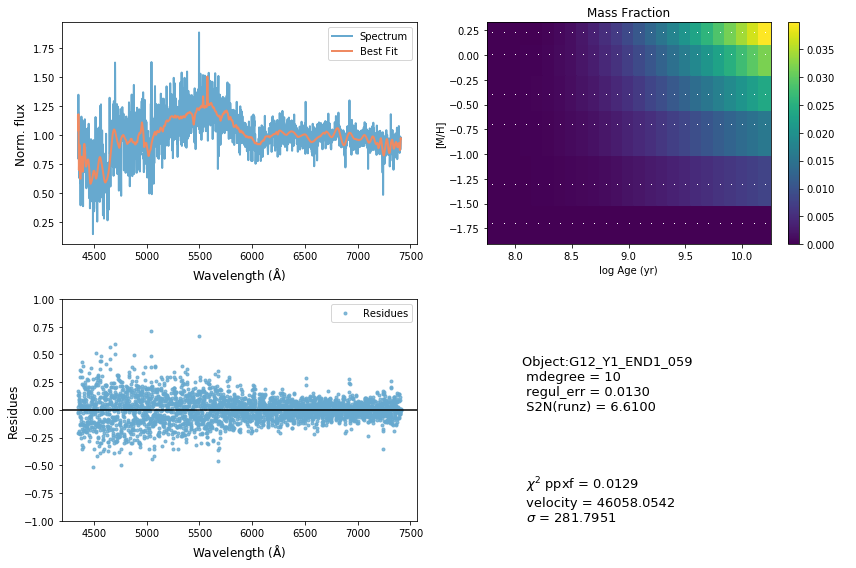

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     44303       949    -0.028     0.046
 comp. 1:     42807        63
 comp. 2:     42282       160
chi2/DOF: 0.003104
method = capfit ; Jac calls: 8 ; Func calls: 171 ; Status: 3
Gas Reddening E(B-V): 5.163
Nonzero Templates:  140  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1548       1.2   42807    63
Comp: 2       Unknown     0.2778       3.9   42282   160
Comp: 2       Unknown    0.07532       2.6   42282   160
---------------------------------------------------------
Weighted <logAge> [yr]: 9.34
Weighted <[M/H]>: -0.39
Weighted <logAge> [yr]: 9.34
Weighted <[M/H]>: -0.39
M/L_r: 0.5093
Current $\chi^2$: 0.0031
Elapsed time in PPXF: 3.21 [min]


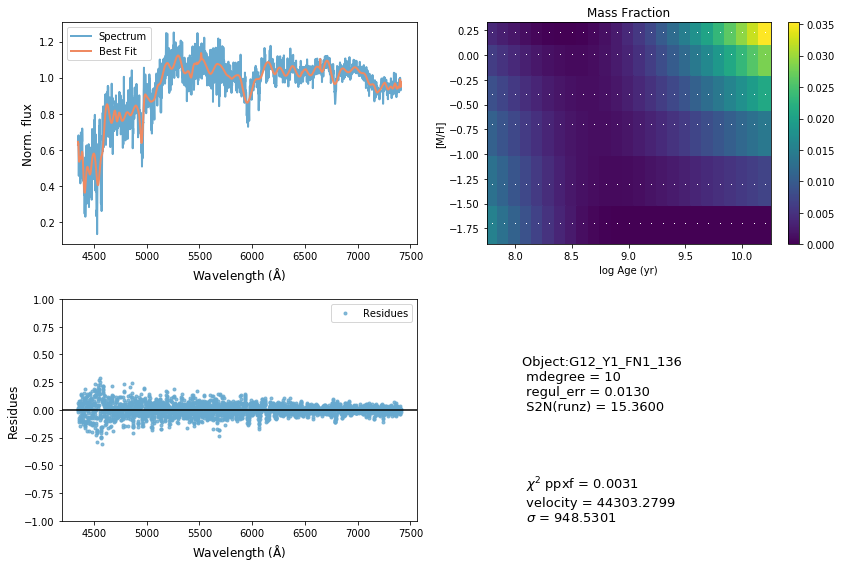

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     32112       165     0.006    -0.008
 comp. 1:     34116       184
 comp. 2:     33837       118
chi2/DOF: 0.003184
method = capfit ; Jac calls: 9 ; Func calls: 195 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  108  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.6886         3   34116   184
Comp: 2       Unknown     0.4183       2.7   33837   118
Comp: 2       Unknown          0       2.5   33837   118
Comp: 2       Unknown          0       2.4   33837   118
---------------------------------------------------------
Weighted <logAge> [yr]: 9.81
Weighted <[M/H]>: -0.222
Weighted <logAge> [yr]: 9.81
Weighted <[M/H]>: -0.222
M/L_r: 1.97
Current $\chi^2$: 0.0032


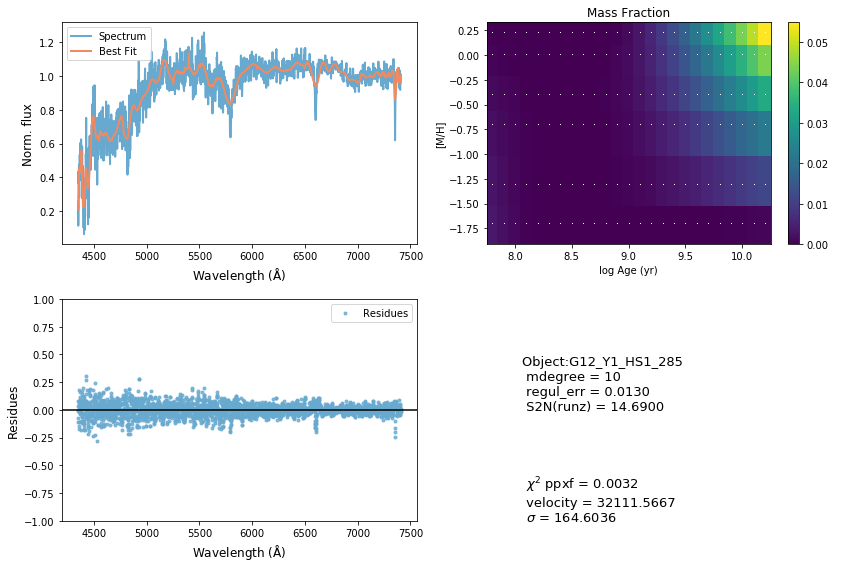

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     35822       366    -0.001    -0.007
 comp. 1:     37116        87
 comp. 2:     37186       180
chi2/DOF: 0.02051
method = capfit ; Jac calls: 9 ; Func calls: 185 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  102  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      0.755       2.9   37116    87
Comp: 2       Unknown          0       4.6   37186   180
Comp: 2       Unknown          0       2.5   37186   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.79
Weighted <[M/H]>: -0.227
Weighted <logAge> [yr]: 9.79
Weighted <[M/H]>: -0.227
M/L_r: 2.388
Current $\chi^2$: 0.0205
Elapsed time in PPXF: 3.30 [min]


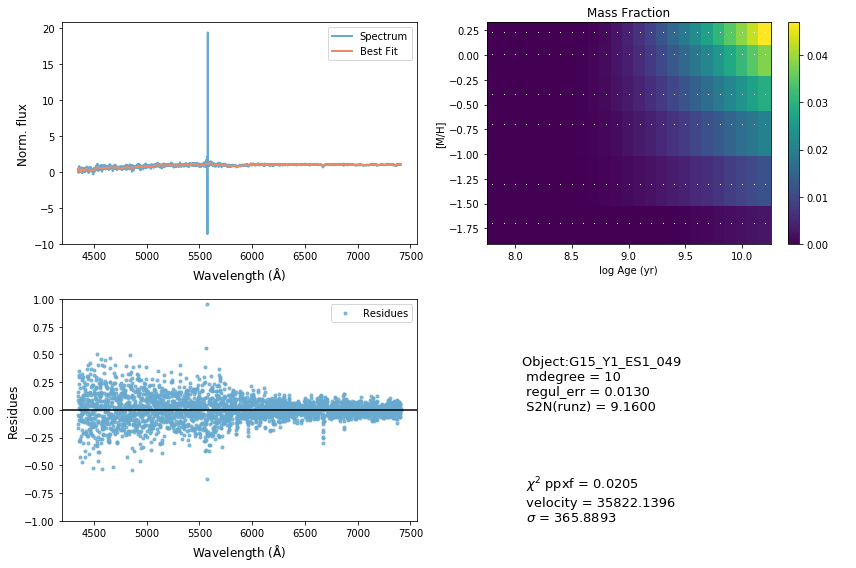

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     68823       189    -0.001     0.004
 comp. 1:     69205      1000
 comp. 2:     69103        82
chi2/DOF: 0.002852
method = capfit ; Jac calls: 11 ; Func calls: 226 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  134  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown      13.04        11   69205  1000
Comp: 2       Unknown          0         3   69103    82
Comp: 2       Unknown          0       2.9   69103    82
Comp: 2       Unknown     0.2131       3.8   69103    82
---------------------------------------------------------
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -0.201
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -0.201
M/L_r: 1.231
Current $\chi^2$: 0.0029
El

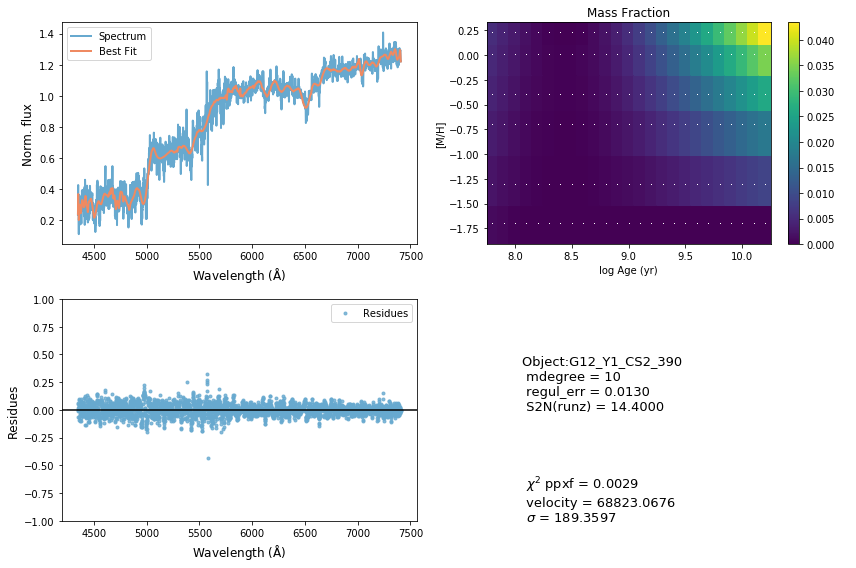

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     67354       436    -0.014    -0.059
 comp. 1:     65958       180
 comp. 2:     65917       348
chi2/DOF: 0.004612
method = capfit ; Jac calls: 17 ; Func calls: 352 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  125  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       4.1   65958   180
Comp: 2       Unknown     0.2682        14   65917   348
Comp: 2       Unknown          0        14   65917   348
Comp: 2       Unknown      1.412       5.5   65917   348
---------------------------------------------------------
Weighted <logAge> [yr]: 9.17
Weighted <[M/H]>: -1.12
Weighted <logAge> [yr]: 9.17
Weighted <[M/H]>: -1.12
M/L_r: 0.3621
Current $\chi^2$: 0.0046
Ela

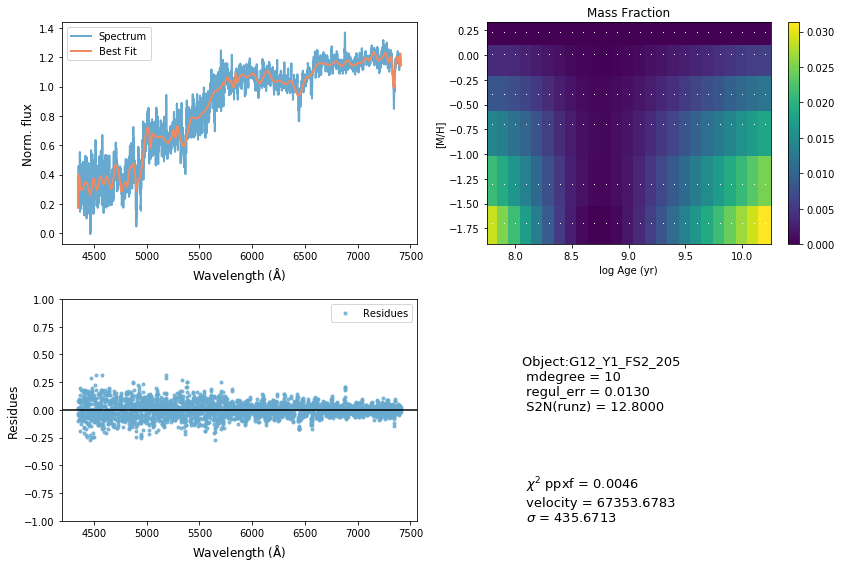

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     66953       923    -0.004    -0.005
 comp. 1:     64953       180
 comp. 2:     65012       110
chi2/DOF: 0.004566
method = capfit ; Jac calls: 5 ; Func calls: 112 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  138  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown    0.07995       2.6   64953   180
Comp: 2       Unknown          0       3.5   65012   110
Comp: 2       Unknown          0       3.5   65012   110
Comp: 2       Unknown     0.3449       3.5   65012   110
---------------------------------------------------------
Weighted <logAge> [yr]: 9.05
Weighted <[M/H]>: -0.428
Weighted <logAge> [yr]: 9.05
Weighted <[M/H]>: -0.428
M/L_r: 0.4027
Current $\chi^2$: 0.0046
E

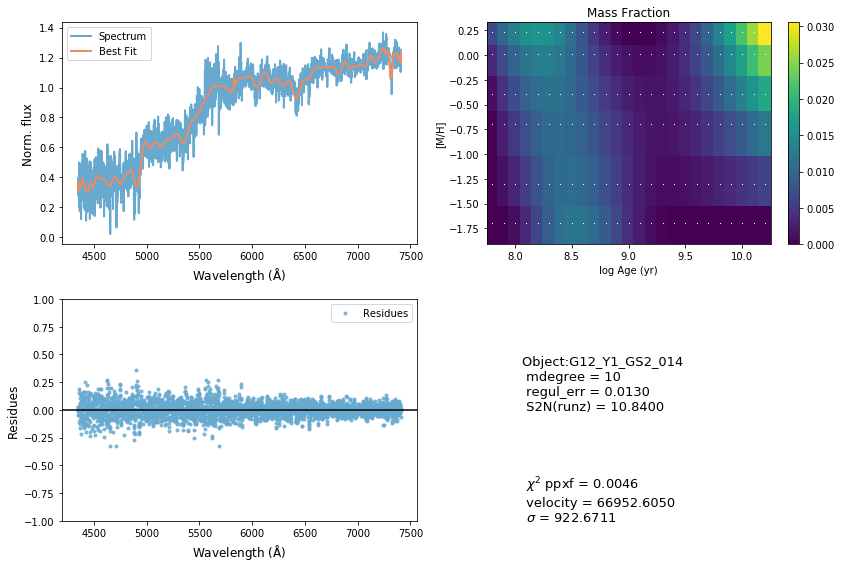

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     50076         1    -0.003    -0.003
 comp. 1:     48023       185
 comp. 2:     48044       206
chi2/DOF: 0.006068
method = capfit ; Jac calls: 5 ; Func calls: 106 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  3  /  155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.2528       3.6   48023   185
Comp: 2       Unknown          0       9.9   48044   206
Comp: 2       Unknown      9.597        10   48044   206
Comp: 2       Unknown          0       4.4   48044   206
Comp: 2       Unknown      0.368       2.6   48044   206
---------------------------------------------------------
Weighted <logAge> [yr]: nan
Weighted <[M/H]>: nan
Weighted <logAge> [yr]: nan
Wei

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in true_divide


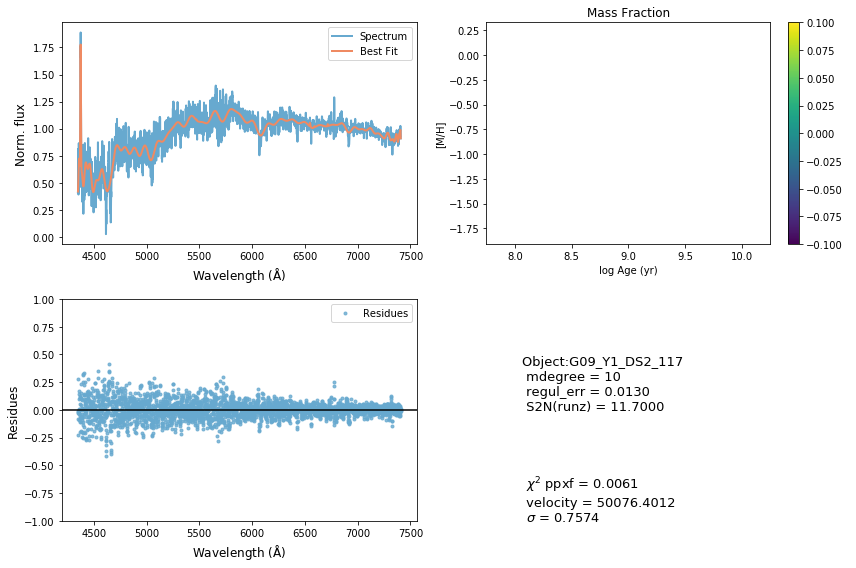

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     52054       183     0.009     0.007
 comp. 1:     50285         1
 comp. 2:     50370        37
chi2/DOF: 0.004
method = capfit ; Jac calls: 14 ; Func calls: 293 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  85  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.1242       2.1   50285     1
Comp: 2       Unknown      0.142       2.7   50370    37
Comp: 2       Unknown          0       2.7   50370    37
Comp: 2       Unknown     0.4454       2.8   50370    37
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.231
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.231
M/L_r: 2.856
Current $\chi^2$: 0.0040
Elapse

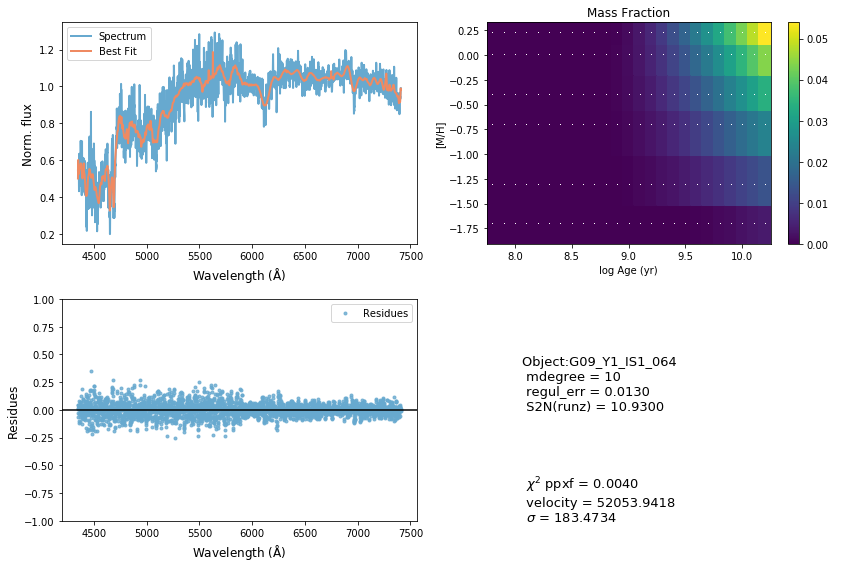

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     66094      1000    -0.002    -0.002
 comp. 1:     64094       180
 comp. 2:     64092       183
chi2/DOF: 0.004535
method = capfit ; Jac calls: 1 ; Func calls: 28 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  1  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       5.2   64094   180
Comp: 2       Unknown          0       5.1   64092   183
Comp: 2       Unknown          0       5.2   64092   183
Comp: 2       Unknown     0.4376       4.7   64092   183
---------------------------------------------------------
Weighted <logAge> [yr]: nan
Weighted <[M/H]>: nan
Weighted <logAge> [yr]: nan
Weighted <[M/H]>: nan
M/L_r: nan
Current $\chi^2$: 0.0045
Elapsed time in 

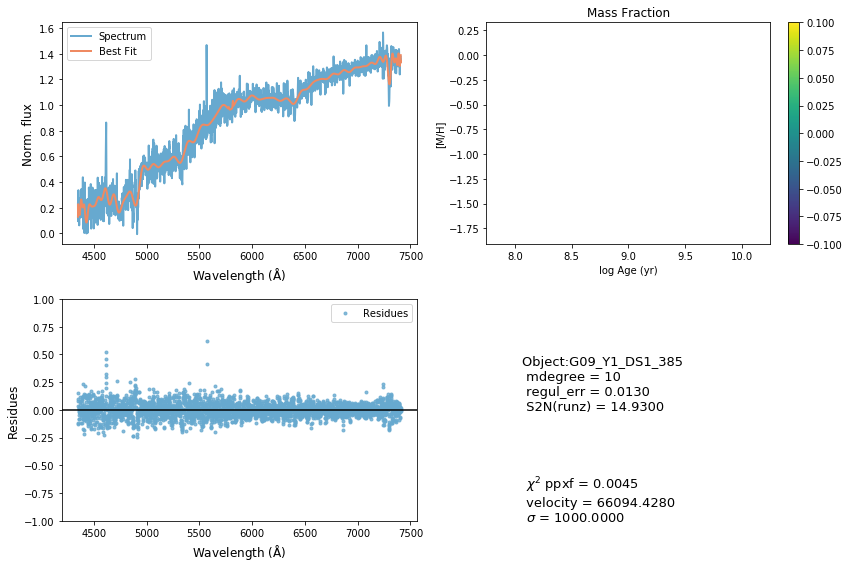

Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     60061       218     0.009     0.002
 comp. 1:     60031       180
 comp. 2:     60303       385
chi2/DOF: 0.01481
method = capfit ; Jac calls: 14 ; Func calls: 292 ; Status: 2
Gas Reddening E(B-V): 10.000
Nonzero Templates:  137  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       2.5   60031   180
Comp: 2       Unknown      24.84   2.4e+03   60303   385
Comp: 2       Unknown          0   2.3e+03   60303   385
Comp: 2       Unknown      1.299       5.7   60303   385
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.227
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.227
M/L_r: 1.584
Current $\chi^2$: 0.0148
El

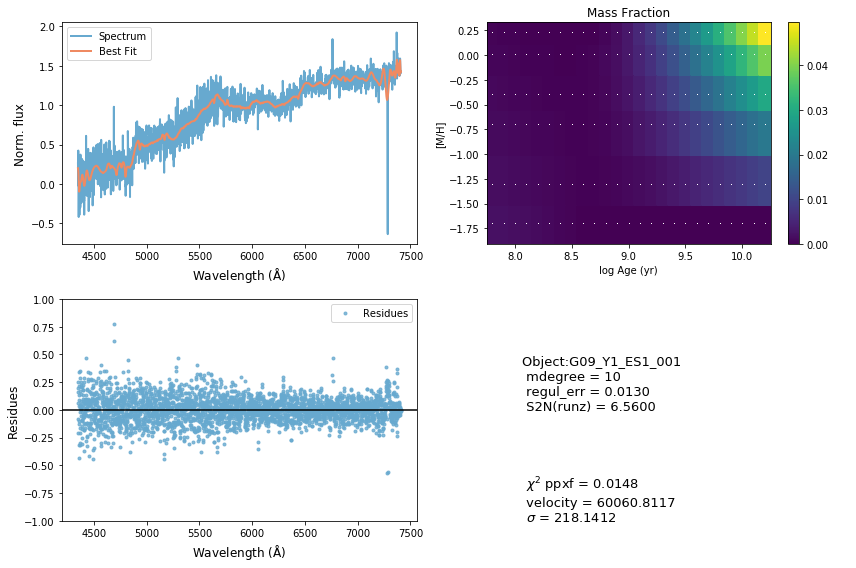

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     35748       207     0.045     0.108
 comp. 1:     35981       180
 comp. 2:     36285        56
chi2/DOF: 0.01033
method = capfit ; Jac calls: 13 ; Func calls: 270 ; Status: 2
Gas Reddening E(B-V): 8.025
Nonzero Templates:  79  /  153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown          0       3.4   35981   180
Comp: 2       Unknown      1.771       2.5   36285    56
Comp: 2       Unknown          0       1.9   36285    56
---------------------------------------------------------
Weighted <logAge> [yr]: 9.85
Weighted <[M/H]>: -0.195
Weighted <logAge> [yr]: 9.85
Weighted <[M/H]>: -0.195
M/L_r: 2.846
Current $\chi^2$: 0.0103
Elapsed time in PPXF: 4.19 [min]


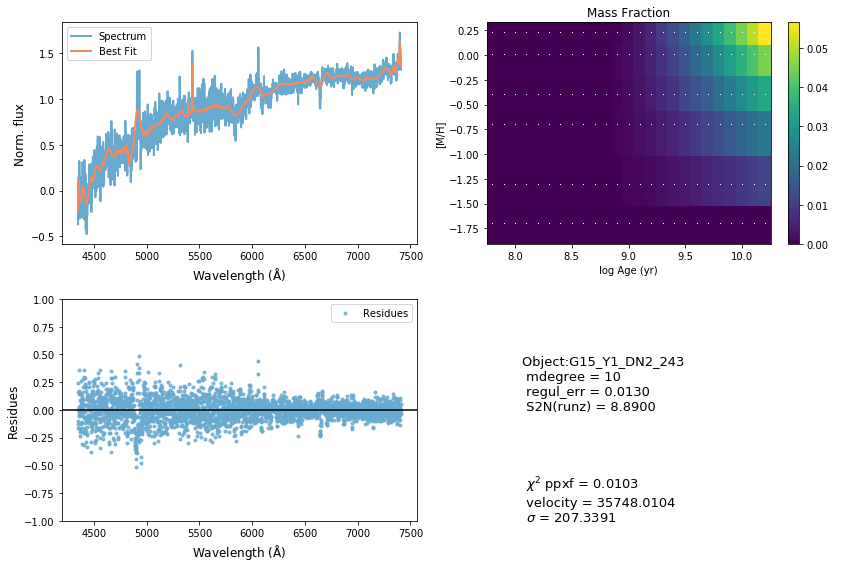

Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']
Best Fit:       Vel     sigma        h3        h4
 comp. 0:     34445       279     0.039    -0.018
 comp. 1:     34355       204
 comp. 2:     33964      1000
chi2/DOF: 0.003225
method = capfit ; Jac calls: 12 ; Func calls: 251 ; Status: 2
Gas Reddening E(B-V): 0.000
Nonzero Templates:  114  /  154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp: 1       Unknown     0.9151       5.5   34355   204
Comp: 2       Unknown      5.283       9.4   33964  1000
Comp: 2       Unknown          0         7   33964  1000
Comp: 2       Unknown      1.569       6.7   33964  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.1
Weighted <logAge> [yr]: 9.69
Weighted <[M/H]>: -1.1
M/L_r: 1.257
Current $\chi^2$: 0.0032
Ela

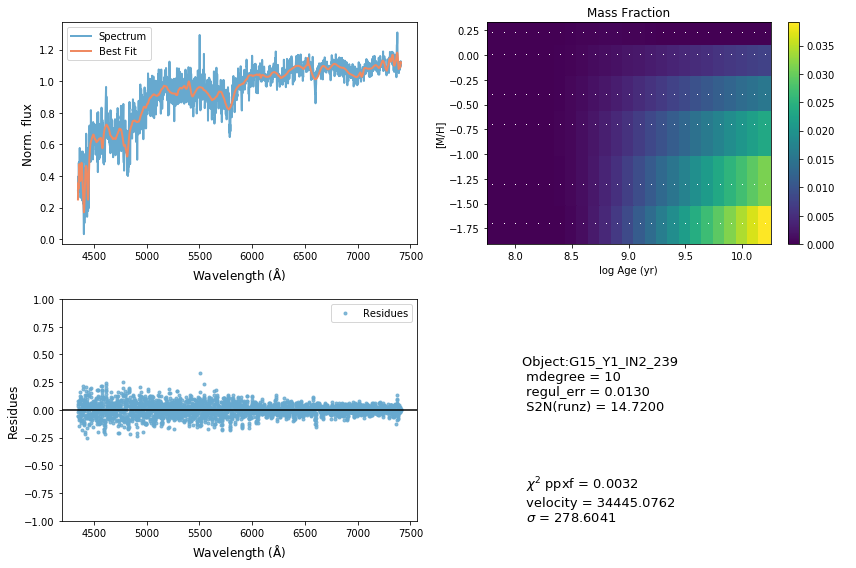

TypeError: must be str, not int

In [13]:
ids_vel = ['CATAID']
for each_sed in range(len(seds_list)):
    
    # settings for the progress bar widget above: does not influence in ppxf -----------------------------------------
    bar.value += each_sed/2.                                          # signal to increment the progress bar
    if each_sed<len(seds_list): 
        bar.bar_style = ""                                            # blue when in progress
    else: 
        bar.bar_style = "success"                                     # green when it finishes        
        
    # flux -----------------------------------------------------------------------------------------------------------
    sed_file  = os.path.join(seds_path, seds_list[each_sed])          # link between path and files
    sed_flux  = pf.getdata(sed_file)[0]                               # opening each spectra
    sed_err   = pf.getdata(sed_file)[1]                               # opening each spectra error
    
    # wavelength -----------------------------------------------------------------------------------------------------
    sed_header = pf.open(sed_file)[0].header
    sed_wl_ini = sed_header['WMIN'] 
    sed_wl_stp = sed_header['CD1_1']
    sed_wl     = np.arange(sed_flux.size)*(sed_wl_stp)+sed_wl_ini     # sed wavelength    
#     plot_sed(sed_wl, sed_flux, sed_err)
    
    # cleaning flux and wavelength trash -----------------------------------------------------------------------------
    idx_clean       = np.where((np.logical_not(np.isnan(sed_flux)))*(sed_err>0))    # indices where NAN is present
    flux_temp       = sed_flux[idx_clean]                                           # removing NAN values from spectra
    flux_temp_err   = sed_err[idx_clean]
    wavelength_temp = sed_wl[idx_clean]    
#     plot_sed(wavelength_temp, flux_temp, flux_temp_err)
    
    # limiting the spectrum regarding the wavelength range of the library --------------------------------------------
    wl_lib_idx = (wavelength_temp>wl_min) & (wavelength_temp<wl_max)       # MILES wavelength range
    flux       = flux_temp[wl_lib_idx]
    flux_err   = flux_temp_err[wl_lib_idx]
    wavelength = wavelength_temp[wl_lib_idx]    
#     plot_sed(wavelength, flux, flux_err)    
    
    # other important parameters -------------------------------------------------------------------------------------
    redshift  = sed_header['Z']
    cataid    = sed_header['CATAID']
#     fwhm_gama = wavelength*gama_resol
    fwhm_gama = 2.
    
    # ppxf -----------------------------------------------------------------------------------------------------------
    vel_scale          = light_speed*np.log(wavelength[1]/wavelength[0])      # velocity scale - Eq.8 Capellari 2017
    
    ### setup templates ----------------------------------------------------------------------------------------------
    #### stellar pops ------------------------------------------------------------------------------------------------
    miles              = lib.miles(miles_lib, vel_scale, fwhm_gama)
    stellar_templates  = miles.templates.reshape(miles.templates.shape[0], -1)
    reg_dim            = miles.templates.shape[1:]
    dv                 = light_speed*(miles.log_lam_temp[0] - np.log(wavelength[0]))  # eq.(8) of Cappellari (2017)
    vel                = light_speed*np.log(1 + redshift)                             # eq.(8) of Cappellari (2017)
    start              = [vel, 180.]
    
    #### gas templates -----------------------------------------------------------------------------------------------
    wl_range_galaxy = np.array([np.min(wavelength), np.max(wavelength)])/(1 + redshift)
    gas_templates, gas_names, line_wave = util.emission_lines(miles.log_lam_temp, wl_range_galaxy, fwhm_gama, 
                                                              tie_balmer=tied_balmer, limit_doublets=limit_doublets)
    number_of_templates = stellar_templates.shape[1]
    number_of_forbidden = np.sum(["[" in a for a in gas_names])                      # forbidden lines contain "[*]"
    number_of_balmer    = len(gas_names) - number_of_forbidden
        
    component = (stellar_comp_w*number_of_templates)+(balmer_comp_w*number_of_balmer)+(forbid_comp_w
                                                                                       *number_of_forbidden)
        
    gas_component = np.array(component) > 0       # gas_component=True for gas templates
    start3        = [start, start, start]         # adopt the same starting value for the 3 components
    gas_reddening = 0 if tied_balmer else None    # If the Balmer lines are tied one should allow for gas reddening.
    
    
    #### all templates -----------------------------------------------------------------------------------------------
    all_templates = np.column_stack([stellar_templates, gas_templates])
    
    ### rebinning the spectrum so it is at the same size as the templates (or smaller) -------------------------------
    new_shape          = stellar_templates[:,0].shape
    rebinning_function = sci.interp1d(wavelength, flux)   # for the flux
    wavelength_rebin   = np.linspace(start=wavelength.min(), stop=wavelength.max(), num=int(new_shape[0]))
    flux_rebin         = rebinning_function(wavelength_rebin)
    
    ### rebinning the error ------------------------------------------------------------------------------------------
    rebin_func_error   = sci.interp1d(wavelength, flux_err)
    wl_rebin_error     = np.linspace(start=wavelength.min(), stop=wavelength.max(), num=int(new_shape[0]))
    flux_err_rebin     = rebin_func_error(wavelength_rebin)
    
    ### final galaxy spectrum and its error to be analysed -----------------------------------------------------------
    galaxy             = flux_rebin/np.median(flux_rebin)               # Normalize spectrum to avoid numerical issues
    noise              = flux_err_rebin/np.median(flux_err_rebin)       # idem
    
#     plot_sed(wavelength_rebin, galaxy, noise)    
    
    ### SED FITTING WITH PPXF ----------------------------------------------------------------------------------------
    start_time = time.clock()
    sed_fit = ppxf(templates=all_templates, galaxy=galaxy, noise=noise, velscale=vel_scale, start=start3, plot=False, 
                   lam=wavelength_rebin, moments=moments, degree=degree, mdegree=mdegree, regul=1./regul_err, 
                   reg_dim=reg_dim, vsyst=dv, clean=False, component=component, gas_component=gas_component,
                   gas_reddening=gas_reddening)
    end_time = time.clock()
    
    ## output parameters -- most of them will become a dataframe at the end of the script  
    residues = (galaxy-sed_fit.bestfit)
    
    stellar_weights = sed_fit.weights[~gas_component]                         # Exclude weights of the gas templates
    stellar_weights = stellar_weights.reshape(reg_dim)/stellar_weights.sum()  # Normalized
    
    velocity = sed_fit.sol[0][0]
    sigma    = sed_fit.sol[0][1]
    
    mean_age.append(miles.mean_age_metal(stellar_weights)[0])
    mean_metal.append(miles.mean_age_metal(stellar_weights)[1])
    mass2light.append(miles.mass_to_light(stellar_weights, band="r"))
    ids.append(cataid)
    redshifts.append(redshift)
       
    print(r"Current $\chi^2$: %.4f" % (sed_fit.chi2))
    print('Elapsed time in PPXF: %.2f [min]' % ((end_time-start_time)/60))
    
    ### Saving fit results -------------------------------------------------------------------------------------------
    output = {}
    output['wavelength'] = wavelength_rebin
    output['flux']       = sed_fit.galaxy
    output['best_fit']   = sed_fit.bestfit
    
    output_df = pd.DataFrame(output)
    output_df.to_csv(os.path.join(results_path, 'fit_'+str(cataid)+'_d'+ str(degree)+'_'+str(mdegree)+'_'+str(wl_min)
                                  +'.csv'), index=False)
    vel_disp.append(sigma)
    ids_vel.append(cataid)

    ### Saving plots -------------------------------------------------------------------------------------------------
    plt.subplots(figsize=(12,8))
    
    #### plot01 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,1)
    plt.plot(wavelength_rebin, sed_fit.galaxy, '-', color=palette[-1], linewidth=lw, label="Spectrum")
    plt.plot(wavelength_rebin, sed_fit.bestfit, '-', color=palette[0], linewidth=lw, label="Best Fit")
#     plt.title("Object %s: S/N=%.4f" % (cataid, s2n_top10[each_sed]))
    plt.legend(loc='best')
    plt.xlabel("Wavelength ($\mathrm{\AA}$)", fontsize=12)
    plt.ylabel("Norm. flux", fontsize=12)
    
    #### plot02 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,2)
    miles.plot(stellar_weights)
    
    #### plot03 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,3)
    plt.plot(wavelength_rebin, residues, '.', color=palette[-1], linewidth=lw, label="Residues", alpha=transparency)
    plt.axhline(y=0, c='black')
    plt.legend(loc='best')
    plt.xlabel("Wavelength ($\mathrm{\AA}$)", fontsize=12)
    plt.ylabel("Residues", fontsize=12)
    plt.ylim([-1,1])
    
    #### plot04 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,4)
    plt.text(0.1, 0.5, "Object:{:s} \n mdegree = {:d} \n regul_err = {:.4f}\n S2N(runz) = {:.4f}".format(sed_header['SPECID'], mdegree, regul_err, sed_header['SN']), fontsize=13)
    plt.text(0.1, 0.0, " \n $\chi^2$ ppxf = {:.4f} \n velocity = {:.4f} \n $\sigma$ = {:.4f}".format(sed_fit.chi2, velocity, sigma), fontsize=13)
    plt.axis('off') 

    plt.tight_layout()
    plt.savefig(os.path.join(results_path, 'gal_'+str(cataid)+'_d'+str(degree)+'_'+str(mdegree)+'_'+str(wl_min)
                             +'.png'))
    plt.show()

sigma_data = np.column_stack([ids_vel, vel_disp])
sigma_data = pd.DataFrame(sigma_data)
sigma_data.to_csv('../../LargeFilesResults/SEDFitting/ResultsRP/veldisp'+'_d'+degree+'_m'+mdegree+'.csv')